# Cats and Dogs Object Detector (CaDoD) -- Group 24 -- Phase 2
Classification of Cats vs. Dogs in Images and Determination of Bounding Boxes for Objects of Interest

# Phase 2 Report

## Team Members
- David Rivera Pinhao [driverap@iu.edu]
- Chinmay Kunte [cvkunte@iu.edu]
- Atharva Kulkarni [athakulk@iu.edu]
- Sanket Atmaram Darwante [sdarwant@iu.edu]

## Team Member Images
![](https://drive.google.com/uc?export=view&id=1LajxZL499sORqTvDKFu15NLHy9yb0Ld5)

## Project Abstract
Computer vision is a field of study that uses machine larning and deep vision to attempt to replicate humans' ability to see and analyze images and videos. There are many applications of computer vision in the modern world that have arisen from countless advancements in the field. It is therefore important to continue to advance computer vision to new heights. To that end, our project, "Cats and Dogs Object Detector", is a direct application of computer vision. The dataset we are using for this phase of the project is a 12,966 image subset of the "Open Images Dataset V6" and corresponding metadata information on each of the images that includes the bounding boxes for the object of interest. The two main goals of the project is to classify whether the image contains a cat or a dog and to determine the bounding box coordinates that best locate where in the image the object of interest is located. The former utilizes machine learning classification techniques while the latter utilizes machine learning regression techniques. In Phase 1, we formed an end-to-end pipeline that transforms the images so that they can be used for learning, standardizes the data, and implements classification and regression algorithms to create models that are test on new images. In Phase 1 we created models using `scikit-learn`, with support vector machines working the best for clasification (67.7% test accuracy) and elastic nets working the best for regression (test MSE of 0.010). For this phase, we switched our focus into two parts: homegrown implementations of linear regression and logistic regression and PyTorch neural network models. The homegrown implementation of linear regression was made to output 4 targets corresponding to the bounding box coordinates, and the logistic regression homegrown implementation was made to extend the loss function to MSE + CXE to predict the class and bounding box coordinates at the same time. There were a total of five PyTorch neural network models created: two baseline models for classification and regression, two multilayer perceptron models for classification and regression, and one more complicated model that represents a multi-headed cat-dog detector using the OOP API in PyTorch with a combined loss function: CXE + MSE. Overall, our models did not show a significant improvement over the models we created using `scikit-learn`. For example, our CXE + MSE PyTorch model returned a test accuracy of 68.157%, which is only a little higher than the SVM test accuracy of 67.7%. Unfortuantely, our models did also overfit quite a bit in some cases. For the next phase, we want to improve on these results, and improve the generalization accuracy and loss of the models. We plan on utilizing even more complicated neural network and deep learning networks (such as EfficientDet and a fully-connected CNN) and seeing how those perform on the same dataset with the aim of achieving better performance across the board.

## Project Description
The purpose of this project is create an end to end pipeline using machine learning that is able to classify between cats and dogs in an image and determine a bounding box that best indicates where the object of interest is located in the image. The dataset that is being used consists of about 13,000 images of varying shapes and aspect ratios. They are all RGB images and have bounding box coordinates stored in a corresponding `.csv` file. In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into machine learning algorithms that will create models. Multiple models will be created during the entireity of the project; for this phase specifically, we focused on create two homegrown machine learning implementations for linear regression and logistic regression. For linear regression, we extended the MSE loss function from one target to four targets. For logistic regression, we extended the loss function from CXE to CXE + MSE. That is, we made it a complex multitask loss function where the resulting model predicts the class and bounding box coordinates at the same time. We also focused on implementing baseline and multilayer perceptron PyTorch models, as well as a special PyTorch model that is a multi-headed cat-dog detector using the OOP API in PyTorch with a combined loss function of CXE + MSE.


## Data Description
The image archive `cadod.tar.gz` is a subset of Open Images V6. Once extracted, the images are placed in the `data` directory. There are a total of 12,966 images of dogs and cats.

Image bounding boxes, as well as additional metadata information, are stored in the `.csv` file `cadod.csv`. This `.csv` file consists of the following columns.
- ImageID: the image this box lives in.
- Source: indicates how the box was made:
    - xclick are manually drawn boxes using the method presented in [1], were the annotators click on the four extreme points of the object. In V6 we release the actual 4 extreme points for all xclick boxes in train (13M), see below.
    - activemil are boxes produced using an enhanced version of the method [2]. These are human verified to be accurate at IoU>0.7.
- LabelName: the MID of the object class this box belongs to (`/m/01yrx` representing “dog” and `/m/0bt9lr` representing “cat”).
- Confidence: a dummy value, always 1.
- XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates. XMin is in [0,1], where 0 is the leftmost pixel, and 1 is the rightmost pixel in the image. Y coordinates go from the top pixel (0) to the bottom pixel (1).
- XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates (as XMin, etc.) of the four extreme points of the object that produced the box using [1] in the case of xclick boxes. Dummy values of -1 in the case of activemil boxes.

The additional attributes in the `cadod.csv` file have the following definitions:
- IsOccluded: Indicates that the object is occluded by another object in the image.
- IsTruncated: Indicates that the object extends beyond the boundary of the image.
- IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We asked annotators to use this tag for cases with more than 5 - instances which are heavily occluding each other and are physically touching.
- IsDepiction: Indicates that the object is a depiction (e.g., a cartoon or drawing of the object, not a real physical instance).
- IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building). For each of them, value 1 indicates present, 0 not present, and -1 unknown.

The `cadod.csv` file has no null values which means that no imputing strategies need to be devised during creation of model pipelines. However, exploration of the raw images and dataset indicate that the images come in many different shapes and sizes. This poses a problem because in order to pass in the images to the machine learning algorithms, they all need to be the same shape. Thus, during raw images have been all preprocessed to be a consistent 128 pixels by 128 pixels, and these processed images are stored in the `data/resized` directory. These resized images also take up significantly less storage; the raw images take up about 830 MB total while the resized images take up about 415 MB total. Once the images have been preprocessed, the data that is strictly needed for implementation of machine learing algorithms is stored in the `data/saved_data` directory: `img.npy` contains all 12,966 images flattened down into a 12966 row by 49152 (128 x 128 x 3) column 2D array; `y_label.npy` contains the array of size 12966 rows that encodes "dog" with a 1 and "cat" with a 0; and `y_bbox.npy` contains a 2D array of size 12966 rows by 4 columns of the 4 vertices of the normalized bounding boxes for each image (that is, XMin, XMax, YMin, and YMax from the `cadod.csv` file). These saved `.npy` files can be loaded easily into numpy variables for use in the machine learning algorithms.

## Phase 2 Overview and Workflow
![](https://drive.google.com/uc?export=view&id=193p3k4V78rV3kiWy9goeWdcaUlSDBexp)


## Loss and Accuracy Metrics
For Phase 2, the following loss and accuracy metrics were utilized, and their equations are shown as well.
- Mean Squared Error (MSE): $\text{MSE} = \frac{1}{n} \sum_{i = 1}^{n} (Y_i - \hat{Y}_i)^2$, where $Y_i$ is a true value, $\hat{Y}_i$ is a predicted value, and $n$ is the number of samples.

- Cross-Entropy Loss (CXE): $\text{CXE} = -\frac{1}{m} \sum_{i = 1}^m (y_i log(\hat{y}_i)$, where $y_i$ is a true value, $\hat{y}_i$ is softmax probability, and $m$ is the number of samples.

- Accuracy Score: $\text{Acc} = \frac{TP + TN}{TP + FP + FN + TN}$, where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives, and $FN$ is the number of false negatives.


## Conclusion
Overall, computer vision is a field of study that uses machine larning and deep vision to attempt to replicate humans' ability to see and analyze images and videos. Our project, "Cats and Dogs Object Detector", is a direct application of computer vision. The dataset we used for this phase of the project is a 12,966 image subset of the "Open Images Dataset V6" and corresponding metadata information on each of the images that includes the bounding boxes for the object of interest. The two main goals of the project, and of this phase, was to classify whether the image contains a cat or a dog and to determine the bounding box coordinates that best locate where in the image the object of interest is located. For this phase, we focused on two tasks: implementing homegrown models for linear regression and logistic regression, and implementing baseline, MLP, and multitask PyTorch models. Our homegrown linear regression models extends the targest to four values corresponding to the bounding box coordinates, and the model we made using our homegrown implementation performs decently well but unfortunatley overfits since the test MSE of 2594 is significantly higher the the final test MSE of 50. On the other hand, our homegrown impementation of logistic regression extends the loss function to CXE + MSE in order to predict the class label and bounding box coordiantes at the same time. This model achieves a test accuracy of 55.7% (train accuracy 66.9%) and a test MSE of 0.557 (train MSE of 0.434). Clearly, the model overfits for clasification but is performing well for the regression portion. As for the PyTorch models, we implemented five of them. We have two baseline models for classification and regression respectively, two multilayer perceptron models for classification and regression, and one multitask model for both classification and regression. Out of these, our last model, predictively, performs the best with a test accuracy of 68.157%, which is better then our best model from the last phase. Unfortuantely, most of the models, especially for classification, overfit fairly significantly despite efforts to reduce overfitting. Additionally, the models we created from this phase do not represent a significant improvement from the models created in the last phase of the project. It is clear that these results are significant and show that simple PyTorch models and homegrown implementations can perform reasonably well on the on the cats and dogs classification and regression problem. That being said, for the next phase, we want to improve on these results, and especially improve the generalization accuracy and loss of the models. We plan on utilizing even more complicated neural network and deep learning networks (such as EfficientDet and a fully-connected CNN) and seeing how those perform on the same dataset with the aim of achieving better performance across the board.

# Phase 1 Notebook
The sections below show the Jupyter notebook for Phase 1 of the project.

## Import Data

First we import most of the necessary python packages that we will be using for this phase of the project.

In [ ]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import tarfile
from tqdm.notebook import tqdm
import warnings
import seaborn as sns
%matplotlib inline

### Unarchive Data

The images are, at first, stored in the `cadod.tar.gz` file. The following function extracts the files to the specified path.

In [ ]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [ ]:
path = 'data/'
extract_tar('cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

Files already exist


### Load Bounding Box Metadata

The bounding box metadata is stored in the `cadod.csv` file, which is read into a Pandas Dataframe that allows us to perform exploratory data analysis below.

In [ ]:
df = pd.read_csv('cadod.csv')

In [ ]:
df.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  0000b9fcba019d36  xclick  /m/0bt9lr           1  0.165000  0.903750   
1  0000cb13febe0138  xclick  /m/0bt9lr           1  0.000000  0.651875   
2  0005a9520eb22c19  xclick  /m/0bt9lr           1  0.094167  0.611667   
3  0006303f02219b07  xclick  /m/0bt9lr           1  0.000000  0.999219   
4  00064d23bf997652  xclick  /m/0bt9lr           1  0.240938  0.906183   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.268333  0.998333           1            1  ...            0         0   
1  0.000000  0.999062           1            1  ...            0         0   
2  0.055626  0.998736           1            1  ...            0         0   
3  0.000000  0.998824           1            1  ...            0         0   
4  0.000000  0.694286           0            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.636250  0.903750  0.748750  0.165000  0.268333  0.506667  0.998333   
1  0.312500  0.000000  0.317500  0.651875  0.000000  0.410882  0.999062   
2  0.487500  0.611667  0.243333  0.094167  0.055626  0.226296  0.998736   
3  0.508594  0.999219  0.000000  0.478906  0.000000  0.375294  0.720000   
4  0.678038  0.906183  0.240938  0.522388  0.000000  0.370000  0.424286   

   XClick4Y  
0  0.661667  
1  0.999062  
2  0.305942  
3  0.998824  
4  0.694286  

[5 rows x 21 columns]

## Exploratory Data Analysis

Before creating baseline machine learning models we first explore the raw data to determine if any preprocessing steps should be applied. Let's first check the statistics to make sure that the files and images have been properly extracted and then check if there are any obvious correlations between the metadata features.

### Statistics

Check and make sure that there are 12,966 images in the data directory and check the size of the data directory in MB.

In [ ]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")
print(f"The total size is {os.path.getsize(path)/1000} MB")

There are a total of 12966 images
The total size is 830.048 MB


The dataframe should have 12,966 rows and 21 columns.

In [ ]:
df.shape

(12966, 21)

Check and make sure there are no empty or NaN cells in the dataframe.

In [ ]:
df.isnull().values.any()

False

Let's summarize the dataframe using `.info()` and `.describe(include = 'all')`. The `include = 'all'` forces the output to include the non-numerical features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12966 entries, 0 to 12965
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ImageID      12966 non-null  object 
 1   Source       12966 non-null  object 
 2   LabelName    12966 non-null  object 
 3   Confidence   12966 non-null  int64  
 4   XMin         12966 non-null  float64
 5   XMax         12966 non-null  float64
 6   YMin         12966 non-null  float64
 7   YMax         12966 non-null  float64
 8   IsOccluded   12966 non-null  int64  
 9   IsTruncated  12966 non-null  int64  
 10  IsGroupOf    12966 non-null  int64  
 11  IsDepiction  12966 non-null  int64  
 12  IsInside     12966 non-null  int64  
 13  XClick1X     12966 non-null  float64
 14  XClick2X     12966 non-null  float64
 15  XClick3X     12966 non-null  float64
 16  XClick4X     12966 non-null  float64
 17  XClick1Y     12966 non-null  float64
 18  XClick2Y     12966 non-null  float64
 19  XCli

In [ ]:
df.describe(include = 'all')

ImageID  Source  LabelName  Confidence          XMin  \
count              12966   12966      12966     12966.0  12966.000000   
unique             12966       2          2         NaN           NaN   
top     0000b9fcba019d36  xclick  /m/0bt9lr         NaN           NaN   
freq                   1   12542       6855         NaN           NaN   
mean                 NaN     NaN        NaN         1.0      0.099437   
std                  NaN     NaN        NaN         0.0      0.113023   
min                  NaN     NaN        NaN         1.0      0.000000   
25%                  NaN     NaN        NaN         1.0      0.000000   
50%                  NaN     NaN        NaN         1.0      0.061250   
75%                  NaN     NaN        NaN         1.0      0.167500   
max                  NaN     NaN        NaN         1.0      0.592500   

                XMax          YMin          YMax    IsOccluded   IsTruncated  \
count   12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.901750      0.088877      0.945022      0.464754      0.738470   
std         0.111468      0.097345      0.081500      0.499239      0.440011   
min         0.408125      0.000000      0.451389     -1.000000     -1.000000   
25%         0.830625      0.000000      0.910000      0.000000      0.000000   
50%         0.941682      0.059695      0.996875      0.000000      1.000000   
75%         0.998889      0.144853      0.999062      1.000000      1.000000   
max         1.000000      0.587088      1.000000      1.000000      1.000000   

        ...   IsDepiction      IsInside      XClick1X      XClick2X  \
count   ...  12966.000000  12966.000000  12966.000000  12966.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...      0.045427      0.001157      0.390356      0.424582   
std     ...      0.209354      0.040229      0.358313      0.441751   
min     ...     -1.000000     -1.000000     -1.000000     -1.000000   
25%     ...      0.000000      0.000000      0.221293      0.096875   
50%     ...      0.000000      0.000000      0.435625      0.415625   
75%     ...      0.000000      0.000000      0.609995      0.820000   
max     ...      1.000000      1.000000      0.999375      0.999375   

            XClick3X      XClick4X      XClick1Y      XClick2Y      XClick3Y  \
count   12966.000000  12966.000000  12966.000000  12966.000000  12966.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.494143      0.506689      0.275434      0.447448      0.641749   
std         0.405033      0.462281      0.415511      0.401580      0.448054   
min        -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%         0.285071      0.130000      0.024323      0.218333      0.405816   
50%         0.531919      0.623437      0.146319      0.480838      0.825000   
75%         0.787500      0.917529      0.561323      0.729069      0.998042   
max         1.000000      0.999375      0.999375      0.999375      1.000000   

            XClick4Y  
count   12966.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.582910  
std         0.403454  
min        -1.000000  
25%         0.400000  
50%         0.646667  
75%         0.882500  
max         0.999375  

[11 rows x 21 columns]

The code below determines which of the columns are numerical and which are categorical. The columns that are integers are actually categorical features and have just been encoded to numbers. This was easily discerned and checked by looking at the dataframes above.

In [ ]:
numerical_ix = df.select_dtypes(include = ['float64']).columns
categorical_ix = df.select_dtypes(include = ['object', 'bool', 'int64']).columns
print(f'numerical   features: {list(numerical_ix)}')
print(f'categorical features: {list(categorical_ix)}')

numerical   features: ['XMin', 'XMax', 'YMin', 'YMax', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y', 'XClick2Y', 'XClick3Y', 'XClick4Y']
categorical features: ['ImageID', 'Source', 'LabelName', 'Confidence', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside']


Let's replace the `LabelName` column so that is has human-readable labels.

In [ ]:
df.LabelName.replace({'/m/01yrx': 'cat', '/m/0bt9lr': 'dog'}, inplace = True)
df.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0000b9fcba019d36  xclick       dog           1  0.165000  0.903750   
1  0000cb13febe0138  xclick       dog           1  0.000000  0.651875   
2  0005a9520eb22c19  xclick       dog           1  0.094167  0.611667   
3  0006303f02219b07  xclick       dog           1  0.000000  0.999219   
4  00064d23bf997652  xclick       dog           1  0.240938  0.906183   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.268333  0.998333           1            1  ...            0         0   
1  0.000000  0.999062           1            1  ...            0         0   
2  0.055626  0.998736           1            1  ...            0         0   
3  0.000000  0.998824           1            1  ...            0         0   
4  0.000000  0.694286           0            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.636250  0.903750  0.748750  0.165000  0.268333  0.506667  0.998333   
1  0.312500  0.000000  0.317500  0.651875  0.000000  0.410882  0.999062   
2  0.487500  0.611667  0.243333  0.094167  0.055626  0.226296  0.998736   
3  0.508594  0.999219  0.000000  0.478906  0.000000  0.375294  0.720000   
4  0.678038  0.906183  0.240938  0.522388  0.000000  0.370000  0.424286   

   XClick4Y  
0  0.661667  
1  0.999062  
2  0.305942  
3  0.998824  
4  0.694286  

[5 rows x 21 columns]

Now let's see how many images contain a dog and how many images contain a cat.

In [ ]:
df.LabelName.value_counts()

dog    6855
cat    6111
Name: LabelName, dtype: int64

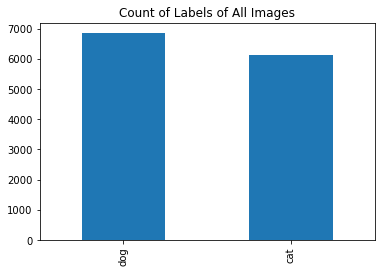

In [ ]:
df.LabelName.value_counts().plot(kind='bar')
plt.title('Count of Labels of All Images')
plt.show()

There is not an equal amount of each class in the image dataset, but the numbers are still resonably close. The data consists of about ~12% more dog images than cat images.

Let's check the value counts of a few more categorical features.

In [ ]:
df[['LabelName', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside']].apply(pd.Series.value_counts)

LabelName  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside
-1         NaN         3.0          3.0        3.0          3.0       3.0
0          NaN      6934.0       3385.0    12783.0      12371.0   12945.0
1          NaN      6029.0       9578.0      180.0        592.0      18.0
cat     6111.0         NaN          NaN        NaN          NaN       NaN
dog     6855.0         NaN          NaN        NaN          NaN       NaN

These value counts provide insight into possible feature engineering in the future. For example, the `IsOccluded` informaton could help in the determination of good bounding boxes in the images by the models.

Let's check the correlation between all of the features in the dataframe. Here we remove the `Confidence` variable from consideration because is only has the same value for all rows.

In [ ]:
variables = ['XMin', 'XMax', 'YMin', 'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y', 'XClick2Y', 'XClick3Y', 'XClick4Y']
correlation = df[variables].corr()
correlation

XMin      XMax      YMin      YMax  IsOccluded  IsTruncated  \
XMin         1.000000  0.103804  0.090813  0.006290    0.112251    -0.149003   
XMax         0.103804  1.000000 -0.083529  0.001176   -0.115249     0.157319   
YMin         0.090813 -0.083529  1.000000 -0.073181    0.147739    -0.208849   
YMax         0.006290  0.001176 -0.073181  1.000000   -0.062223     0.343788   
IsOccluded   0.112251 -0.115249  0.147739 -0.062223    1.000000    -0.093756   
IsTruncated -0.149003  0.157319 -0.208849  0.343788   -0.093756     1.000000   
IsGroupOf   -0.045129  0.047915 -0.007378 -0.010383    0.089984    -0.017391   
IsDepiction -0.003565 -0.020573  0.015071 -0.035134   -0.032279    -0.095418   
IsInside    -0.001281  0.001948  0.005109 -0.023480    0.026993    -0.004693   
XClick1X     0.171845  0.082206  0.047808 -0.006224    0.073061     0.009881   
XClick2X     0.104226  0.110433  0.008927 -0.006295    0.029136     0.032514   
XClick3X     0.154513  0.234758 -0.001801 -0.009941    0.042914     0.057065   
XClick4X     0.184075  0.176847  0.037606  0.008905    0.100454     0.014494   
XClick1Y    -0.014338 -0.012135  0.135875  0.018956    0.080188     0.003144   
XClick2Y     0.001371 -0.036563  0.176044  0.091570    0.091800     0.019021   
XClick3Y     0.037439  0.038044  0.101187  0.145309    0.035143     0.081859   
XClick4Y     0.014788  0.051177  0.098794  0.131983    0.066217     0.090464   

             IsGroupOf  IsDepiction  IsInside  XClick1X  XClick2X  XClick3X  \
XMin         -0.045129    -0.003565 -0.001281  0.171845  0.104226  0.154513   
XMax          0.047915    -0.020573  0.001948  0.082206  0.110433  0.234758   
YMin         -0.007378     0.015071  0.005109  0.047808  0.008927 -0.001801   
YMax         -0.010383    -0.035134 -0.023480 -0.006224 -0.006295 -0.009941   
IsOccluded    0.089984    -0.032279  0.026993  0.073061  0.029136  0.042914   
IsTruncated  -0.017391    -0.095418 -0.004693  0.009881  0.032514  0.057065   
IsGroupOf     1.000000     0.031091  0.045410  0.040796  0.025022  0.016812   
IsDepiction   0.031091     1.000000  0.021234  0.014577 -0.002304 -0.013640   
IsInside      0.045410     0.021234  1.000000  0.026219  0.031492  0.016644   
XClick1X      0.040796     0.014577  0.026219  1.000000  0.515711  0.302655   
XClick2X      0.025022    -0.002304  0.031492  0.515711  1.000000  0.349234   
XClick3X      0.016812    -0.013640  0.016644  0.302655  0.349234  1.000000   
XClick4X      0.012422     0.002735 -0.001875  0.351178 -0.111941  0.460921   
XClick1Y     -0.010900    -0.001785  0.024680  0.292254  0.339360  0.443243   
XClick2Y      0.022449     0.011127  0.005625  0.514306  0.379019  0.360727   
XClick3Y      0.032975     0.007438  0.014154  0.558042  0.396836  0.445288   
XClick4Y      0.016375    -0.001444  0.005826  0.490527  0.433210  0.534976   

             XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  
XMin         0.184075 -0.014338  0.001371  0.037439  0.014788  
XMax         0.176847 -0.012135 -0.036563  0.038044  0.051177  
YMin         0.037606  0.135875  0.176044  0.101187  0.098794  
YMax         0.008905  0.018956  0.091570  0.145309  0.131983  
IsOccluded   0.100454  0.080188  0.091800  0.035143  0.066217  
IsTruncated  0.014494  0.003144  0.019021  0.081859  0.090464  
IsGroupOf    0.012422 -0.010900  0.022449  0.032975  0.016375  
IsDepiction  0.002735 -0.001785  0.011127  0.007438 -0.001444  
IsInside    -0.001875  0.024680  0.005625  0.014154  0.005826  
XClick1X     0.351178  0.292254  0.514306  0.558042  0.490527  
XClick2X    -0.111941  0.339360  0.379019  0.396836  0.433210  
XClick3X     0.460921  0.443243  0.360727  0.445288  0.534976  
XClick4X     1.000000  0.341789  0.412812  0.397735  0.445053  
XClick1Y     0.341789  1.000000  0.316209 -0.050422  0.317888  
XClick2Y     0.412812  0.316209  1.000000  0.472689  0.317642  
XClick3Y     0.397735 -0.050422  0.472689  1.000000  0.540201  
XClick4Y     0.445053  0.317888  0.317642  0.540201  1.000000

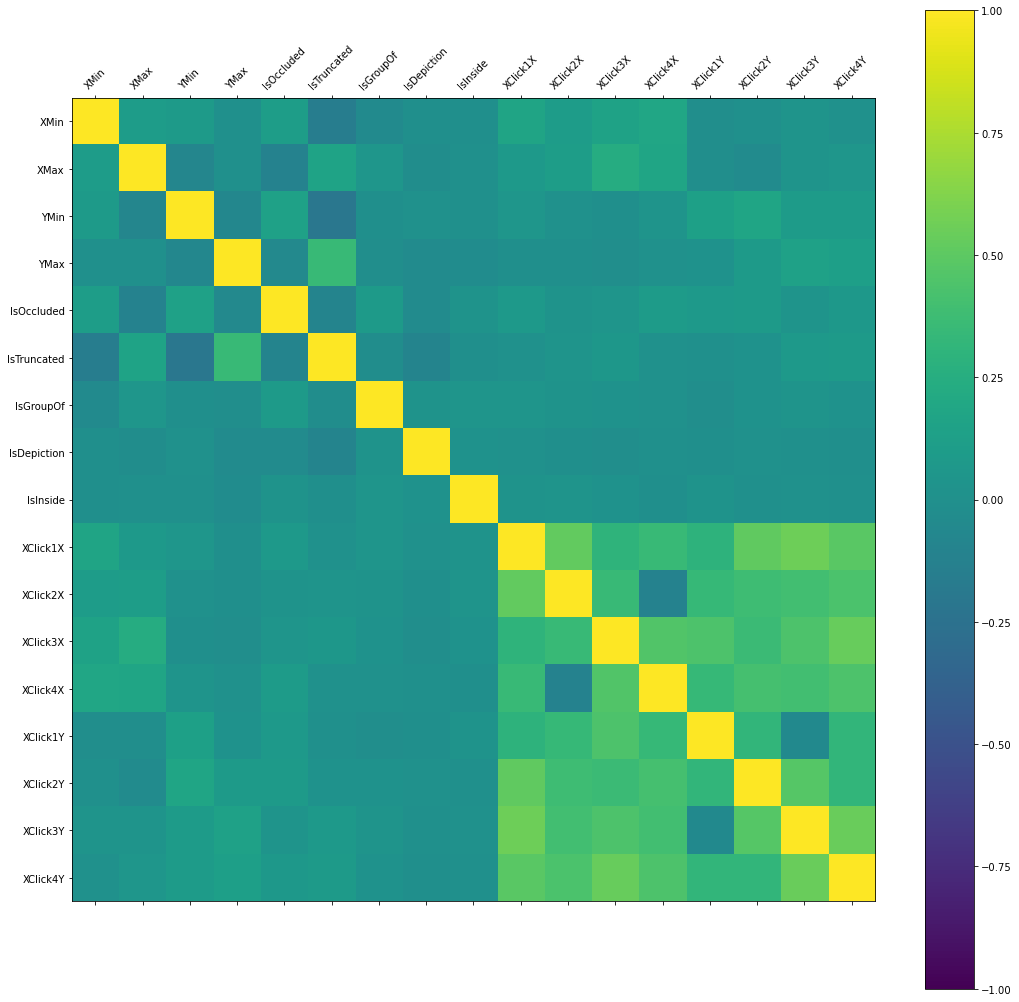

In [ ]:
fig = plt.figure(figsize = (18, 18))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,17,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(variables, rotation = 45)
ax.set_yticklabels(variables)
plt.show()

The only obvious correlation that can be seen is between the features `XClick` features. This makes sense since all the coordinates of the bounding box are correlated with other coordinates since they all depend on the position of the bounding box itself. Other than that, there are no correlations that appear to stick out from the correlation matrix visual. Most correlation values seem to fall between the range -0.25 and 0.25, which is low correlation.

Let's also use the `seaborn` package visualize the correlation of a few select features and visualize the distributions of the dogs and cats across those features.

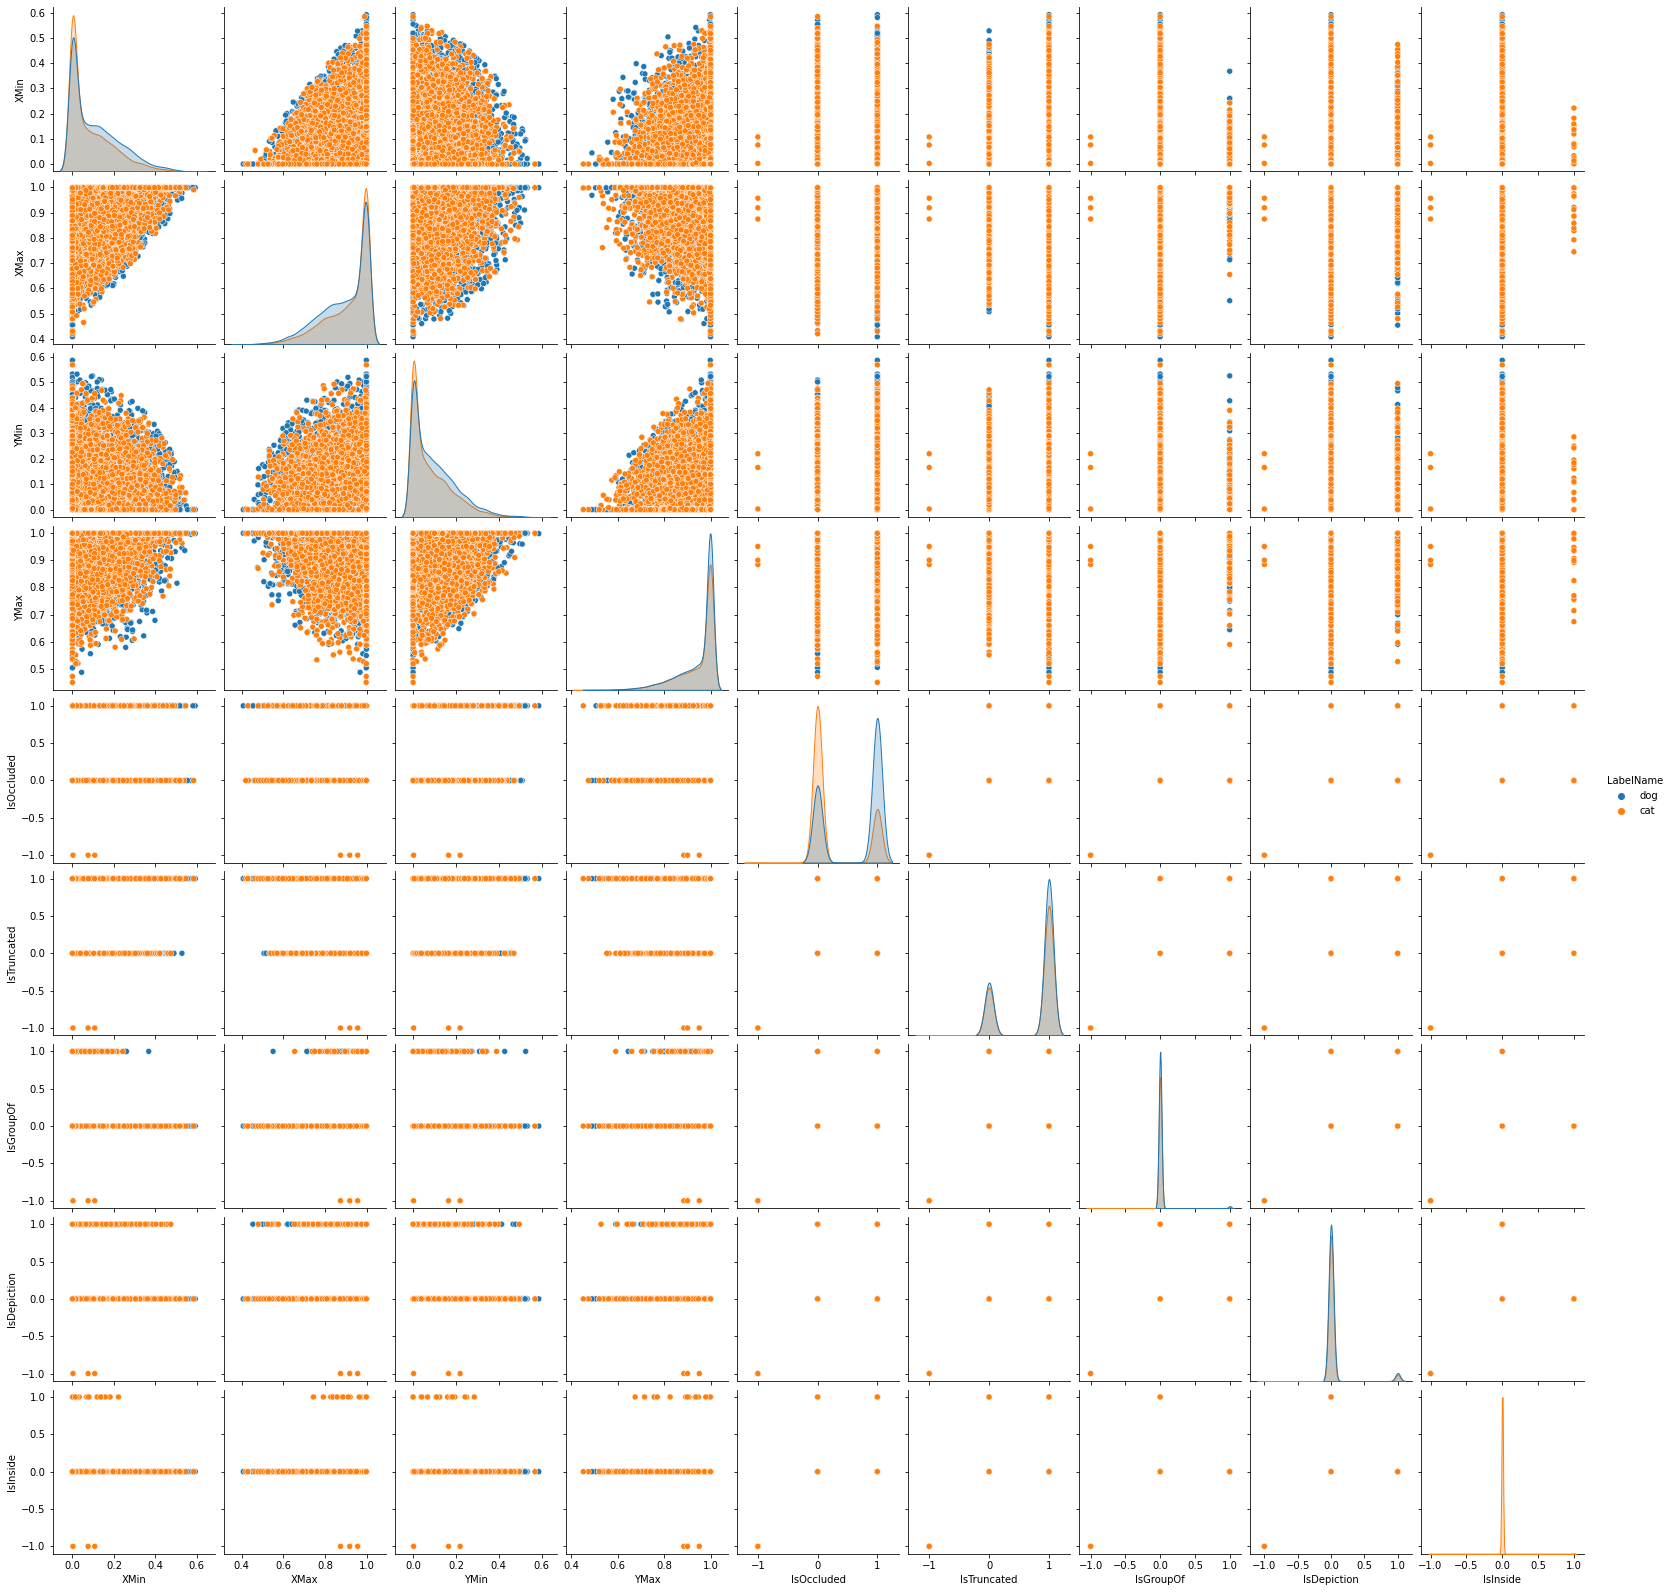

In [ ]:
sns.pairplot(data = df, hue = 'LabelName', vars = ['XMin', 'XMax', 'YMin', 'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside'])

The distribution graphs along the main diagonal indicate that for each of the features, the cat and dog labels are very similarly distributed. The only real differences lie in the actual counts of those class labels; for example, for the feature `IsOccluded`, there are a lot more cats that are not occluded in the images compared to dogs and, correspondingly, a lot more dogs that are occluded in the images compared to cats. The other pairwise plots do not indicate any more correlation information than what was already determined from the correlation matrix visual from before.

### Image Samples

The code below outputs six random images from the data directory. The code also adds the bounding box information for the six images which are extracted from the dataframe of the `cadod.csv` file. This ensures that that images were properly extracted from the `tar.gz` file.

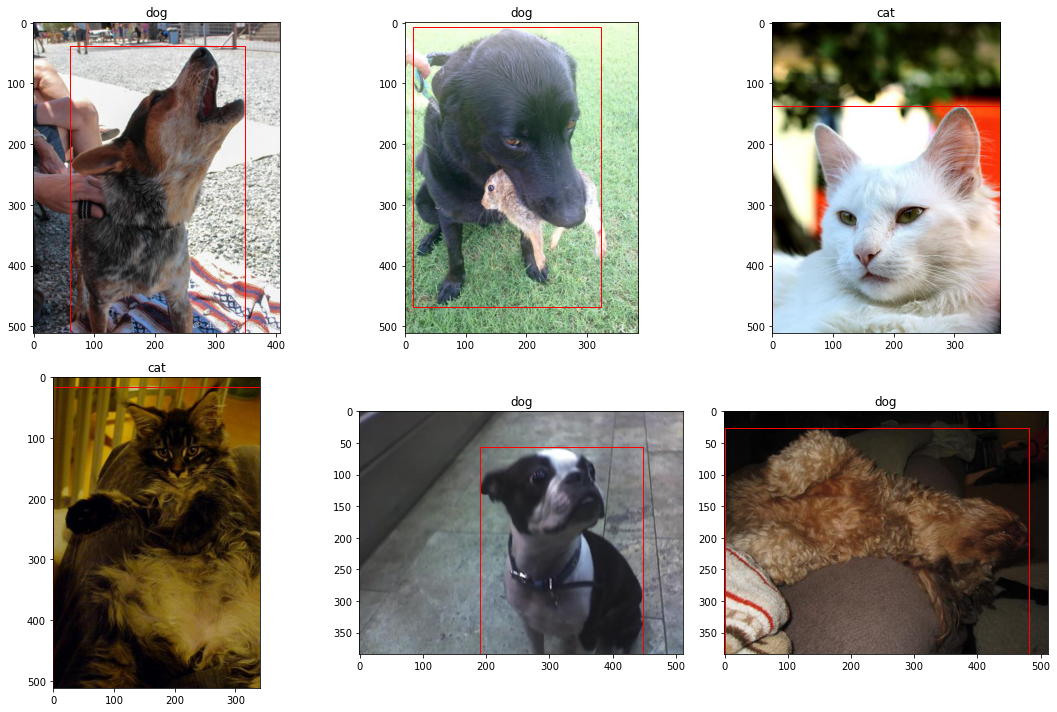

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(df.shape[0], size = 6, replace = False)):
    img = mpimg.imread('data/' + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j, 4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0] * w, coords[2] * h),
                                  coords[1] * w - coords[0] * w, coords[3] * h - coords[2] * h,
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

### Image Shapes and Sizes

It is evident from the sample images above that there is a wide variety of image sizes and shapes. Let's go through all of the images in the data directory and store the shape and size information in a numpy array.

In [ ]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i, f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path + '/' + f
    img = Image.open(file)
    img_shape.append(f'{img.size[0]}x{img.size[1]}')
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

We can count the different shapes using a `Counter` object and a Pandas dataframe.

In [ ]:
img_shape_count = Counter(img_shape)

In [ ]:
img_df = pd.DataFrame(set(img_shape_count.items()), columns = ['img_shape', 'img_count'])
img_df

img_shape  img_count
0     400x512          4
1     353x512          5
2     451x512          3
3     460x512          5
4     406x512          5
..        ...        ...
589   512x404         11
590   300x512          1
591   512x472          8
592   512x483          7
593   277x512          1

[594 rows x 2 columns]

In [ ]:
img_df.shape

(594, 2)

There are a ton of different image shapes: 594, to be exact. Let's narrow this down by getting a sum of any image shape that has a count less than 100 and putting that in a category called `other`.

In [ ]:
img_df = img_df.append({'img_shape': 'other', 'img_count': img_df[img_df.img_count < 100].img_count.sum()},
                       ignore_index = True)
img_df

img_shape  img_count
0     400x512          4
1     353x512          5
2     451x512          3
3     460x512          5
4     406x512          5
..        ...        ...
590   300x512          1
591   512x472          8
592   512x483          7
593   277x512          1
594     other       3259

[595 rows x 2 columns]

We can now drop any rows where the `img_count` is less than 100.

In [ ]:
img_df = img_df[img_df.img_count >= 100]
img_df

img_shape  img_count
96    512x382        127
157   512x512       1103
218   512x288        182
300   512x342        392
315   384x384        113
357   512x340        736
368   384x512        616
411   340x512        143
456   341x512        331
466   512x341       2013
521   512x339        169
530   512x384       3782
594     other       3259

The below code verifies that we did not remove any images in the count.

In [ ]:
img_df.img_count.sum() == df.shape[0]

True

We can now plot the counts of the image shapes.

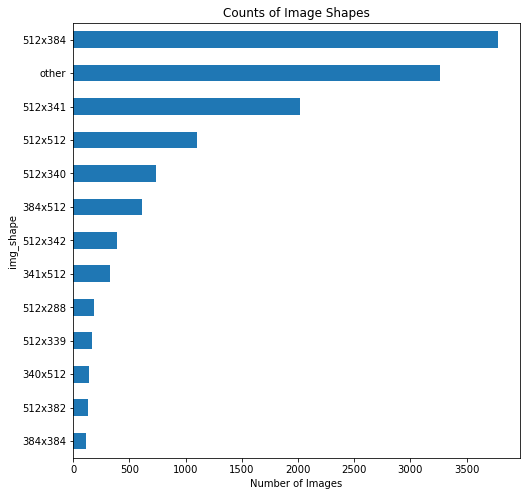

In [ ]:
img_df.sort_values('img_count', inplace = True)
img_df.plot(x = 'img_shape', y = 'img_count', kind = 'barh', figsize = (8,8), legend = False)
plt.title('Counts of Image Shapes')
plt.xlabel('Number of Images')
plt.show()

The `other` image shape encompasses a large number of images, which indicates that the image shapes are extremely varied. This is a problem for when we want to use machine learning as we want each flattened image sample to have the same number of features.

Now we can take a look at the image sizes. The code below plots the distribution of the image sizes in MB.

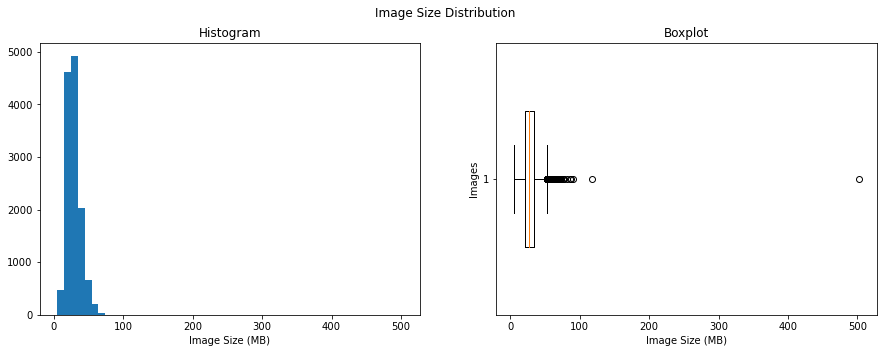

In [ ]:
img_size = img_size / 1000

fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins = 50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert = False, widths = 0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

Most of the images appear to be between 0 and 100 MB in size, though the boxplot clearly indicates that there are some outliers in the distribution, including what appears to be one image that is substantially larger than the others at about 500 MB.

## Preprocessing

The exploratory data analysis revealed that the images have many different shapes and sizes. In order for the images to be used to create machine learning models, the images need to be consistently shaped so that each image sample has the same number of features. Therefore, the first step before creating the models is to preprocess the data by rescaling each image to a specific size. Here, we choose image sizes of 128 x 128 pixels, so that each image is a square. This will also reduce the size of most of the images so that the machine learning algorithms can run faster on them while preserving the overall appearence of the images. The resized images are placed in the `data/resized` directory.

### Rescaling

The code below resizes each of the images, and also creates a numpy array that will store the image data as a flattened array with 128 * 128 * 3, or 49152, columns.

In [ ]:
resized_exists = os.path.isdir('data/resized')
if resized_exists: print('The data/resized directory already exists.')

The data/resized directory already exists.


In [ ]:
!mkdir -p data/resized

In [ ]:
%%time
# Resize image and save, convert to numpy
if not resized_exists:
    img_arr = np.zeros((df.shape[0], 128 * 128 * 3)) # initialize np.array

    for i, f in enumerate(tqdm(df.ImageID)):
        img = Image.open(path + f + '.jpg')
        img_resized = img.resize((128, 128))
        img_resized.save('data/resized/' + f + '.jpg', 'JPEG', optimize = True)
        img_arr[i] = np.asarray(img_resized, dtype = np.uint8).flatten()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11.2 µs


The code below checks to make sure that there are exactly 12,966 images in the resized directory. The size of the folder is also calculated in order to compared to the total size of all the raw images.

In [ ]:
print(f"There are a total of {len(glob.glob1(path + '/resized', '*.jpg'))} images")
print(f"The total size is {os.path.getsize(path + '/resized')/1000} MB")

There are a total of 12966 images
The total size is 414.976 MB


The code below plots six random images from the resized images directory. This is done to ensure that the resizing was performed correctly.

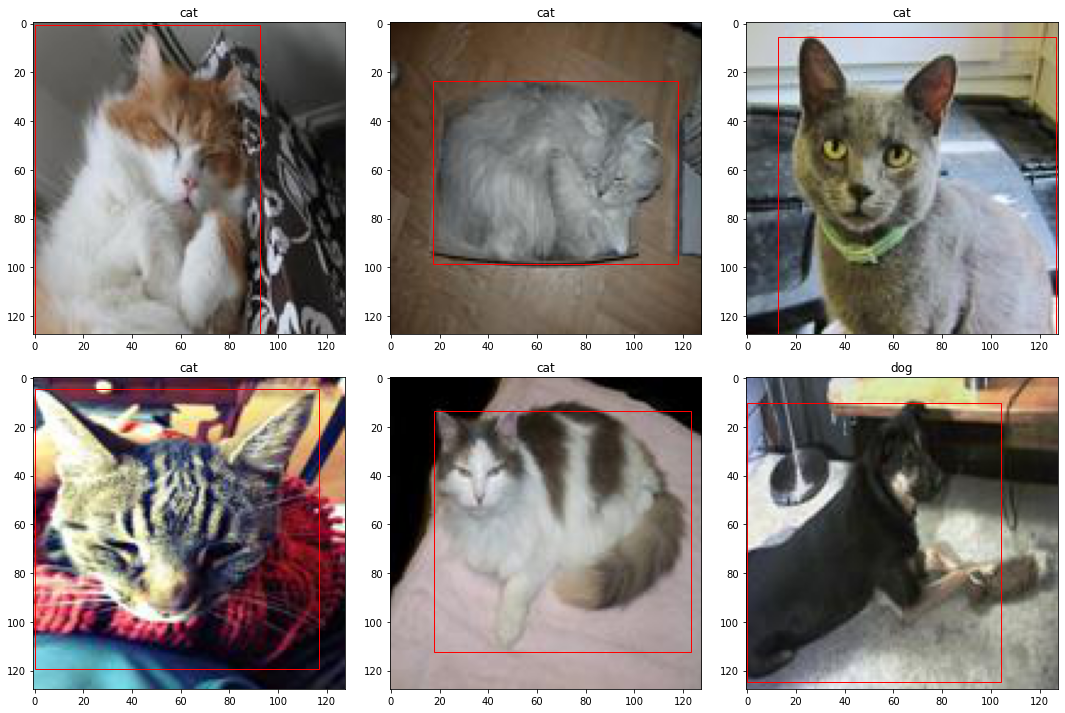

In [ ]:
# Plot random 6 images
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(df.shape[0], size = 6, replace = False)):
    img = mpimg.imread(path + '/resized/' + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j, 4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j, 2])
    ax[i].add_patch(plt.Rectangle((coords[0] * w, coords[2] * h), 
                                  coords[1] * w - coords[0] * w, coords[3] * h - coords[2] * h, 
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

While the images are now lower quality, they are all the same shape (128 by 128 pixels) and it is still recognizable to us humans whether the image contains a dog or a cat.

Finally, let's create a new column in the metadata dataframe that encodes the label 'dog' as a 1 and encodes the label 'cat' as a 0. These new labels will be used in the machine learning algorithms.

In [ ]:
# Encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)
df['Label']

0        1
1        1
2        1
3        1
4        1
        ..
12961    0
12962    0
12963    0
12964    0
12965    0
Name: Label, Length: 12966, dtype: uint8

### Checkpoint and Saving the Data

Now that exploratory data analysis and preprocessing steps are completed, let's save the image numpy array, the labels, and the normalized bounding box coordinates so that they can be loaded as needed later.

In [ ]:
saved_data_exists = os.path.isdir('data/saved_data')
if saved_data_exists: print('The data/saved_data directory already exists.')

The data/saved_data directory already exists.


In [ ]:
!mkdir -p data/saved_data

In [ ]:
if not saved_data_exists:
    np.save('data/saved_data/img.npy', img_arr.astype(np.uint8))
    np.save('data/saved_data/y_label.npy', df.Label.values)
    np.save('data/saved_data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

## Baseline Models

Before creating more complex and sofisticated models, let's first create a baseline classification model and a baseline regression model. These models will be used to compare models that are created in the future, and the hope is to see major improvements the ability of the models to correctly classify the images as containing a cat or a dog and to correctly compute the bounding box coordinates of the object of interest.

### Load the Data

The data saved earlier is now reloaded into the corresponding variables `X`, `y_label`, and `y_bbox`.

In [ ]:
X = np.load('data/saved_data/img.npy', allow_pickle = True)
y_label = np.load('data/saved_data/y_label.npy', allow_pickle = True)
y_bbox = np.load('data/saved_data/y_bbox.npy', allow_pickle = True)

### Check the Loaded Data

We first check to make sure that the data was properly loaded. Each of the variables should have 12966 rows (that is, one row for each image).

In [ ]:
print(X.shape, y_label.shape, y_bbox.shape)

(12966, 49152) (12966,) (12966, 4)


In [ ]:
X

array([[ 55, 129, 179, ...,  59, 140, 203],
       [121, 121, 119, ..., 254, 255, 255],
       [ 95, 101,  91, ...,  36,  25,  21],
       ...,
       [235, 235, 233, ..., 235, 232, 229],
       [209, 119,  10, ...,  32,   7,   2],
       [ 81,  67,  57, ..., 203, 195, 172]], dtype=uint8)

In [ ]:
y_label

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_bbox

array([[0.165   , 0.268333, 0.90375 , 0.998333],
       [0.      , 0.      , 0.651875, 0.999062],
       [0.094167, 0.055626, 0.611667, 0.998736],
       ...,
       [0.001475, 0.042406, 0.988201, 0.62426 ],
       [0.      , 0.037523, 0.998125, 0.999062],
       [0.148045, 0.07064 , 0.999069, 0.94702 ]], dtype=float32)

### Plot Random Images

The following dictionary defines what the values of 1 and 0 refer to in the `y_label` array.

In [ ]:
idx_to_label = {1:'dog', 0:'cat'} # For y_label, 1 refers to dog and 0 refers to cat

The code below plots some random images to ensure that all the data was properly loaded. Notice that here we are reconstructing the image from the numpy array itself instead of just showing the image that is saved in the `data/resized` directory. Thus, this code also checks that the images were properly flattened and converted to the numpy arrays.

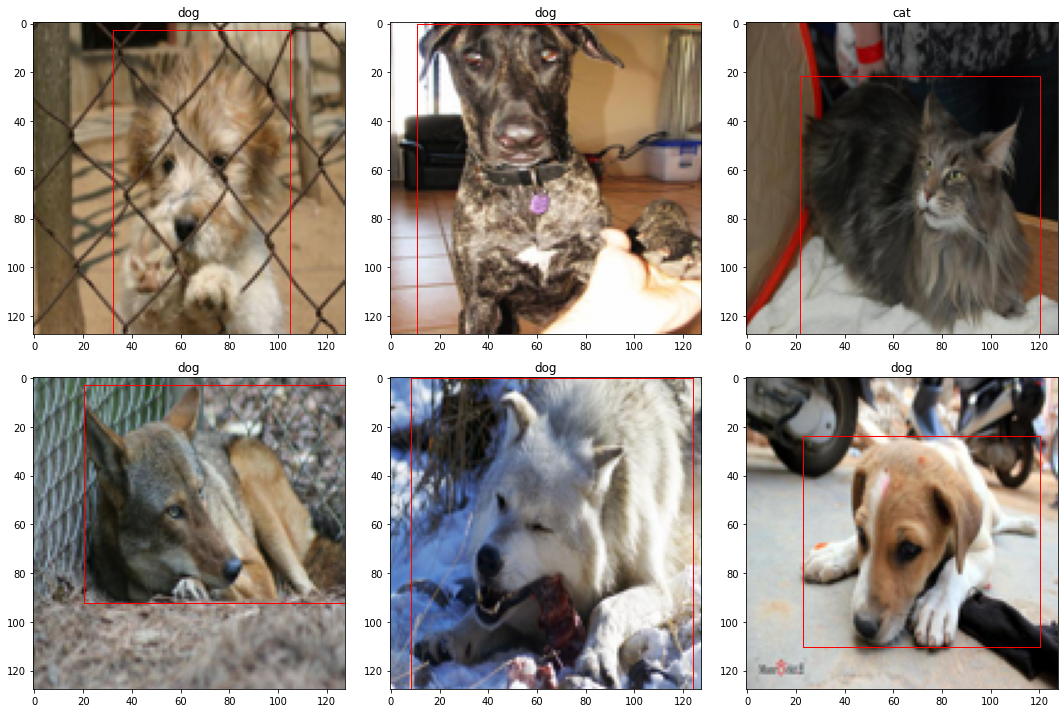

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(X.shape[0], size = 6, replace = False)):
    coords = y_bbox[j] * 128
    ax[i].imshow(X[j].reshape(128, 128, 3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2] - coords[0], coords[3] - coords[1], 
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

Everything looks good so far in terms of loading the data!

### Classification Baseline: Logistic Regression (25% Subsample)

First we will create a classification baseline model using Logistic Regression. Only 25% of the samples are used in order to test the Logistic Regression model and ensure that it was properly performed.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.25
subsample_rate = 0.25

# Subsample the train and test sets to use only 25% of the samples
X_train_label_s, _, y_train_label_s, _ = train_test_split(X_train_label, y_train_label, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_label_s, _, y_test_label_s, _ = train_test_split(X_test_label, y_test_label, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

Let's check the sizes of all the variables defined above in order to make sure that the train and test splits and the subsample splits were performed properly.

In [ ]:
print('X_train_label:', X_train_label.shape)
print('X_test_label:', X_test_label.shape)
print('y_train_label:', y_train_label.shape)
print('y_test_label:', y_test_label.shape)
print('X_train_label_s:', X_train_label_s.shape)
print('X_test_label_s:', X_test_label_s.shape)
print('y_train_label_s:', y_train_label_s.shape)
print('y_test_label_s:', y_test_label_s.shape)

X_train_label: (10372, 49152)
X_test_label: (2594, 49152)
y_train_label: (10372,)
y_test_label: (2594,)
X_train_label_s: (2593, 49152)
X_test_label_s: (648, 49152)
y_train_label_s: (2593,)
y_test_label_s: (648,)


The `model_results_label` dataframe below will store the results of the models that we create. This log will allow us to easily compare how different models perform.

In [ ]:
model_results_label = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])
model_results_label

Empty DataFrame
Columns: [Model, Train Accuracy, Test Accuracy, Train F1-Score, Test F1-Score]
Index: []

Now we create a pipeline using the `Pipeline` class. First, we will scale the data using `MinMaxScaler()` so that all the values are squashed to be between 0 and 1. The Logistic Regression model is the next step of the pipeline, and we initialize it with an `l2` penalty and using the `lbfgs` solver. The maximum number of iterations is set to 15. The results of the model are calculated using the accuracy score, which measures how many labels the model got correct. The F1-Score is also calculated, and this represents the harmonic mean between the precision and recall scores. Higher values are better for both measures.

In [ ]:
%%time
model = Pipeline([('scaler', MinMaxScaler()),
                  ('logreg', LogisticRegression(penalty = 'l2',
                                                solver = 'lbfgs',
                                                random_state = 42,
                                                max_iter = 15,
                                                n_jobs = -1,
                                                verbose = 5))], verbose = True)

model.fit(X_train_label_s, y_train_label_s)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.2s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Pipeline] ............ (step 2 of 2) Processing logreg, total= 1.2min
CPU times: user 1.82 s, sys: 915 ms, total: 2.73 s
Wall time: 1min 14s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished


In [ ]:
model_results_label.loc[len(model_results_label.index)] = ['Logistic Regression Baseline (25% Subsample)',
                                                           accuracy_score(y_train_label_s, model.predict(X_train_label_s)),
                                                           accuracy_score(y_test_label_s, model.predict(X_test_label_s)),
                                                           f1_score(y_train_label_s, model.predict(X_train_label_s)),
                                                           f1_score(y_test_label_s, model.predict(X_test_label_s))]

In [ ]:
model_results_label

Model  ...  Test F1-Score
0  Logistic Regression Baseline (25% Subsample)  ...       0.590164

[1 rows x 5 columns]

The code below plots 10 random images from the test image data, and allows us to visually see some of the results of the model. The probability of the label calculated by Logistic Regression is shown along with the label itself.

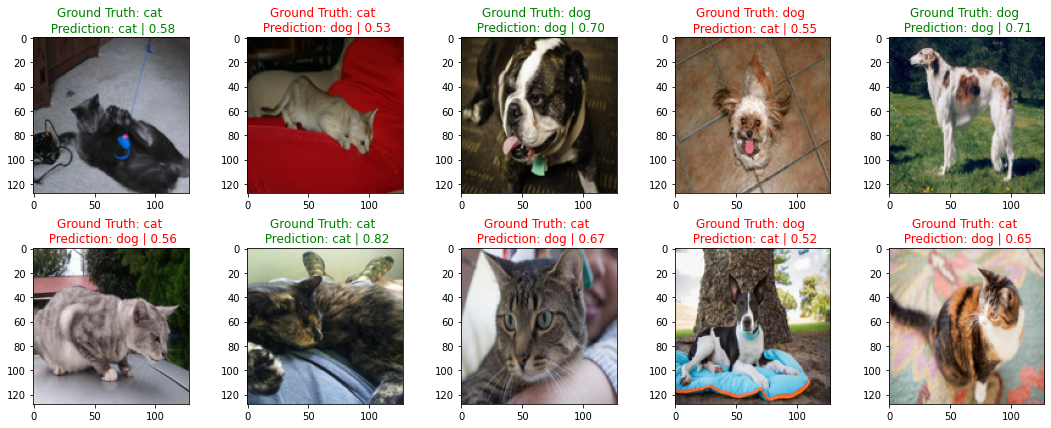

In [ ]:
y_pred_label_s = model.predict(X_test_label_s)
y_pred_label_s_proba = model.predict_proba(X_test_label_s)

fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = False, sharey = False, figsize = (15, 6))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(X_test_label_s.shape[0], size = 10, replace = False)):
#for i in range(10):
    img = X_test_label_s[j].reshape(128, 128, 3)
    ax[i].imshow(img)
    ax[i].set_title('Ground Truth: {0} \n Prediction: {1} | {2:.2f}'.format(idx_to_label[y_test_label_s[j]], 
                                                                            idx_to_label[y_pred_label_s[j]],
                                                                            y_pred_label_s_proba[j][y_pred_label_s[j]]), 
                    color = ('green' if y_pred_label_s[j] == y_test_label_s[j] else 'red'))

plt.tight_layout()
plt.show()

#### Results and Discussion
The baseline classification model using 25% of the images achieves a train accuracy of 0.661 and a test accuracy of 0.537. The F1-Scores mirror these scores. This is a good start for a classification baseline, as the model is predicting whether the images contain a cat or a dog with more than just by random chance (0.5). The train accuracy is, however, quite a bit larger than the test accuracy, which indicates that the Logistic Regression model may be overfitting slightly. Stronger regularization may be needed in order to decrease the overfitting performed by this model.

The image outputs indicate that the Logistic Regression model is calculating viable probabilities for each of the images it sees in the test set (and not just a probability close to 0.5). The images the model got wrong actually have probabilities closer to 0.5, which is a good sign indiciating that the model was unsure on the images it got wrong. The images it classified correctly have slightly higher probabilities.

### Regression Baseline: Linear Regression (25% Subsample)

Next we will create a regression baseline model using Linear Regression. Only 25% of the samples are used in order to test the Linear Regression model and ensure that it was properly performed.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.25
subsample_rate = 0.25

# Subsample the train and test sets to use only 25% of the samples
# We must stratify in the same way as with labels in order to merge the classification and regression results
X_train_bbox_s, _, y_train_bbox_s, _ = train_test_split(X_train_bbox, y_train_bbox, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_bbox_s, _, y_test_bbox_s, _ = train_test_split(X_test_bbox, y_test_bbox, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

Let's check the sizes of all the variables defined above in order to make sure that the train and test splits and the subsample splits were performed properly.

In [ ]:
print('X_train_bbox:', X_train_bbox.shape)
print('X_test_bbox:', X_test_bbox.shape)
print('y_train_bbox:', y_train_bbox.shape)
print('y_test_bbox:', y_test_bbox.shape)
print('X_train_bbox_s:', X_train_bbox_s.shape)
print('X_test_bbox_s:', X_test_bbox_s.shape)
print('y_train_bbox_s:', y_train_bbox_s.shape)
print('y_test_bbox_s:', y_test_bbox_s.shape)

X_train_bbox: (10372, 49152)
X_test_bbox: (2594, 49152)
y_train_bbox: (10372, 4)
y_test_bbox: (2594, 4)
X_train_bbox_s: (2593, 49152)
X_test_bbox_s: (648, 49152)
y_train_bbox_s: (2593, 4)
y_test_bbox_s: (648, 4)


The `model_results_bbox` dataframe below will store the results of the models that we create. This log will allow us to easily compare how different models perform.

In [ ]:
model_results_bbox = pd.DataFrame(columns = ['Model', 'Train MSE', 'Test MSE'])
model_results_bbox

Empty DataFrame
Columns: [Model, Train MSE, Test MSE]
Index: []

Now we create a pipeline using the `Pipeline` class. First, we will scale the data using `MinMaxScaler()` so that all the values are squashed to be between 0 and 1. The Linear Regression model is the next step of the pipeline, and we initialize it using the default parameters (other than n_jobs set to -1). The results of the model are calculated using the mean squared error, which measures how different the predicted normalized bounding box coordinates are from the true values. Lower values are typically better for mean squared error.

In [ ]:
%%time
model = Pipeline([('scaler', MinMaxScaler()),
                  ('linreg', LinearRegression(n_jobs = -1))], verbose = True)

model.fit(X_train_bbox_s, y_train_bbox_s)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   1.3s
[Pipeline] ............ (step 2 of 2) Processing linreg, total=  36.6s
CPU times: user 2min, sys: 14.2 s, total: 2min 14s
Wall time: 37.9 s


In [ ]:
model_results_bbox.loc[len(model_results_bbox.index)] = ['Linear Regression Baseline (25% Subsample)',
                                                         mean_squared_error(y_train_bbox_s, model.predict(X_train_bbox_s)),
                                                         mean_squared_error(y_test_bbox_s, model.predict(X_test_bbox_s))]

In [ ]:
model_results_bbox

Model     Train MSE  Test MSE
0  Linear Regression Baseline (25% Subsample)  2.190538e-29  0.020752

The code below plots the same 10 random images from the test image data as before, and allows us to visually see some of the results of the model. The results for the regression and the classification model are combined by simply using the results from before and adding the predicted and true bounding boxes directly to the images.

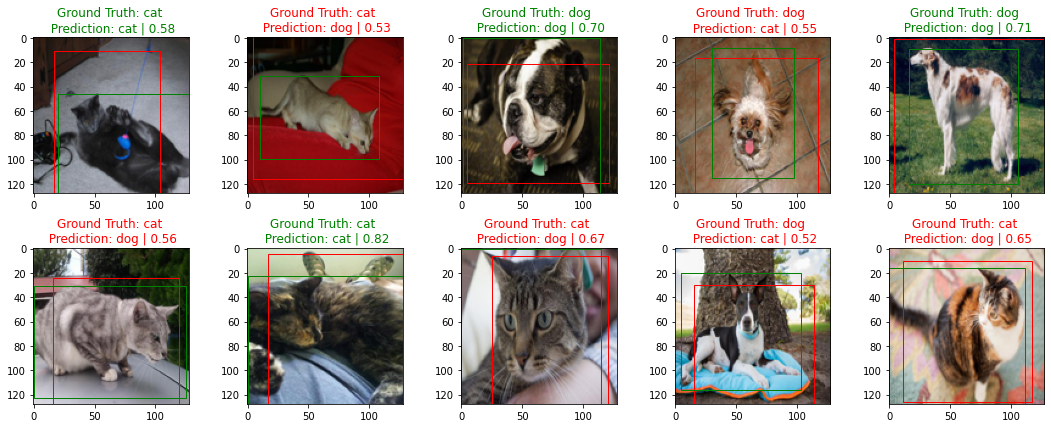

In [ ]:
y_pred_bbox_s = model.predict(X_test_bbox_s)

fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = False, sharey = False, figsize = (15, 6))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(X_test_bbox_s.shape[0], size = 10, replace = False)):
#for j in range(10):
    img = X_test_bbox_s[j].reshape(128, 128, 3)
    coords = y_pred_bbox_s[j] * 128
    coords_true = y_test_bbox_s[j] * 128
    ax[i].imshow(img)
    ax[i].set_title('Ground Truth: {0} \n Prediction: {1} | {2:.2f}'.format(idx_to_label[y_test_label_s[j]],
                                                                            idx_to_label[y_pred_label_s[j]],
                                                                            y_pred_label_s_proba[j][y_pred_label_s[j]]),
                    color = ('green' if y_pred_label_s[j] == y_test_label_s[j] else 'red'))
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]),
                                  coords[2] - coords[0], coords[3] - coords[1], 
                                  edgecolor = 'red', facecolor = 'none'))
    ax[i].add_patch(plt.Rectangle((coords_true[0], coords_true[1]),
                                  coords_true[2] - coords_true[0], coords_true[3] - coords_true[1], 
                                  edgecolor = 'green', facecolor = 'none'))

plt.tight_layout()
plt.show()

#### Results and Discussion
The baseline regression model using 25% of the images achieves an extremely low train MSE and a test MSE of 0.021. This is a really good result for a baseline regression model, though the Linear Regression model appears to be heavily overfitting to the training set. This is to be expected since this Linear Regression model does not implement any type of regularization.

The output images are the same as before, but with the predicted and true bounding boxes added on to them. The bounding boxes are being predicted quite well, relatively speaking. They seem to be zero-ing in to the correct bounding box coordinates but most of them are still larger in size. The goal for the future models is to generally make the bounding boxes smaller to encompass only the object of interest.

### Classification and Regression Baseline Models Using 100% of the Data

Now let's see what happens when all of the data is used instead of the 25% subsample. The code below is largely the same as before, and the results using the full dataset are added to the model log dataframes respectively.

#### Classification
The first step is classification using the same pipeline as before. This time, the `.fit` function is called on the entire training image dataset.

In [ ]:
%%time
model = Pipeline([('scaler', MinMaxScaler()),
                  ('logreg', LogisticRegression(penalty = 'l2',
                                                solver = 'lbfgs',
                                                random_state = 42,
                                                max_iter = 15,
                                                n_jobs = -1,
                                                verbose = 5))], verbose = True)

model.fit(X_train_label, y_train_label)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   5.3s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Pipeline] ............ (step 2 of 2) Processing logreg, total= 6.3min
CPU times: user 7.71 s, sys: 3.7 s, total: 11.4 s
Wall time: 6min 22s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.3min finished


In [ ]:
model_results_label.loc[len(model_results_label.index)] = ['Logistic Regression Baseline (All Data)',
                                                           accuracy_score(y_train_label, model.predict(X_train_label)),
                                                           accuracy_score(y_test_label, model.predict(X_test_label)),
                                                           f1_score(y_train_label, model.predict(X_train_label)),
                                                           f1_score(y_test_label, model.predict(X_test_label))]

The results are printed in the table below in order to compare with the baseline model.

In [ ]:
model_results_label

Model  ...  Test F1-Score
0  Logistic Regression Baseline (25% Subsample)  ...       0.590164
1       Logistic Regression Baseline (All Data)  ...       0.609823

[2 rows x 5 columns]

#### Regression

The second step is regression using the same pipeline as before. This time, the `.fit` function is called on the entire training image dataset.

In [ ]:
%%time
model = Pipeline([('scaler', MinMaxScaler()),
                  ('linreg', LinearRegression(n_jobs = -1))], verbose = True)

model.fit(X_train_bbox, y_train_bbox)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   5.0s
[Pipeline] ............ (step 2 of 2) Processing linreg, total=10.6min
CPU times: user 38min 25s, sys: 2min 9s, total: 40min 34s
Wall time: 10min 40s


In [ ]:
model_results_bbox.loc[len(model_results_bbox.index)] = ['Linear Regression Baseline (All Data)',
                                                         mean_squared_error(y_train_bbox, model.predict(X_train_bbox)),
                                                         mean_squared_error(y_test_bbox, model.predict(X_test_bbox))]

The results are printed in the table below in order to compare with the baseline model.

In [ ]:
model_results_bbox

Model     Train MSE  Test MSE
0  Linear Regression Baseline (25% Subsample)  2.190538e-29  0.020752
1       Linear Regression Baseline (All Data)  8.155056e-30  0.033020

#### Results

For classification, the all data Logistic Regression baseline model performs slightly better than the baseline model using only 25% of the images. It also appears to overfit less in general, which is a good sign that the increased number of samples relative to the number of features helped the classifier be more robust.

On the other hand, for regression, the all data Linear Regression baseline model performs slightly worse than the baseline model using only 25% of the images. This may indicate that the model overfitted even more with the expanded number of features: the train MSE is still substantially lower than the test MSE.

## Sklearn CaDoD Pipeline and GridSearch

Now that the baseline models have been created, we move on to performing GridSearch in order to conduct hyperparameter tuning. We also decided to initially perform GridSearch on a subsample in order to get decent parameter selections more quickly, and we perform the GridSearch on numerous types of classifiers and regressors at the same time. Once the initial GridSearches are complete, the classifier and regressor that performed the best in general is chosen, and these models will undergo another round of GridSearch with a larger subsample to really hone in on the best parameters. Once the best parameters are found, the entire train and test sets are used to fit and predict the chosen models with the best parameters.

### Load the Data

The data saved earlier is now reloaded into the corresponding variables `X`, `y_label`, and `y_bbox`.

In [ ]:
X = np.load('data/saved_data/img.npy', allow_pickle = True)
y_label = np.load('data/saved_data/y_label.npy', allow_pickle = True)
y_bbox = np.load('data/saved_data/y_bbox.npy', allow_pickle = True)

### Classification: Multiple Algorithms GridSearch

First let's look at classification. In order to help improve the results of classification, a new image processing technique is applied to the images before inserting them in to the models for fitting. The image processing technique that is chosen here is called histogram of oriented gradients, or HOG for short. HOG is a feature descriptor used in computer vision and image processing for the purpose of object detection and it works by counting occurrences of gradient orientation in localized portions of an image. This method is similar to that of edge orientation histograms but differs in that it is computed on a dense grid of uniformly spaced cells and uses overlapping local contrast normalization for improved accuracy, according to Wikipedia.

Before HOG can be used, the images need to be converted into grayscale as well. The below classes are custom defined Transformer functions that perform the grayscale conversion of the images and then perform the HOG image processing using the `skimage` package. These Transformer classes are necessary so that they can be directly placed in a `Pipeline` object. The HOG image processing uses mostly default settings provided by the package.

In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.base import BaseEstimator, TransformerMixin
import skimage

class GrayScaleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return np.array([rgb2gray(image.reshape(128, 128, 3)) for image in X])
    
class HogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, orientations = 8, pixels_per_cell = (8, 8), cells_per_block = (3, 3), block_norm = 'L2-Hys', y = None):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
        self.y = y
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        def hog_function(image):
            return skimage.feature.hog(image, orientations = self.orientations, pixels_per_cell = self.pixels_per_cell,
                                       cells_per_block = self.cells_per_block, block_norm = self.block_norm, feature_vector = True)
        
        return np.array([hog_function(image) for image in X])

Let's create a subset of the samples for GridSearch (otherwise the computational requirements are far beyond the current capabilities that we possess).

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.04
subsample_rate = 0.04

# Subsample the train and test sets to use only 4% of the samples
X_train_label_s, _, y_train_label_s, _ = train_test_split(X_train_label, y_train_label, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_label_s, _, y_test_label_s, _ = train_test_split(X_test_label, y_test_label, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

The code below checks the sizes of the varibles to ensure they are formed correctly.

In [ ]:
print('X_train_label:', X_train_label.shape)
print('X_test_label:', X_test_label.shape)
print('y_train_label:', y_train_label.shape)
print('y_test_label:', y_test_label.shape)
print('X_train_label_s:', X_train_label_s.shape)
print('X_test_label_s:', X_test_label_s.shape)
print('y_train_label_s:', y_train_label_s.shape)
print('y_test_label_s:', y_test_label_s.shape)

X_train_label: (10372, 49152)
X_test_label: (2594, 49152)
y_train_label: (10372,)
y_test_label: (2594,)
X_train_label_s: (414, 49152)
X_test_label_s: (103, 49152)
y_train_label_s: (414,)
y_test_label_s: (103,)


The code below defines a function that performs GridSearch for multiple algorithms in sequence. The classification algorithms that are attempted are Logistic Regression, K-Nearest Neighbors, Stochastic Gradient Descent, and Support Vector Machine. For each of these algorithms, a parameter dictionary grid is created so that GridSearch can perform hyperparameter tuning along with cross-fold validation. The Pipeline now consists of the custom transformers from before, and then the features are scaled using `MinMaxScaler`. Once those steps are complete, the Pipeline performs the specified model of that iteration. The output below the code gives extensive information on the parameters that are being tested during each GridSearch as well as the best parameter found after the GridSearch is completed.

In [ ]:
grid_results_label = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

def ConductGridSearch(X_train, y_train, X_test, y_test):
    classifiers = [('logreg', LogisticRegression(n_jobs = -1, random_state = 42)),
                   ('knn', KNeighborsClassifier(n_jobs = -1)),
                   ('sgd', SGDClassifier(n_jobs = -1, random_state = 42)),
                   ('svm', SVC(random_state = 42))]
                   #('dt', DecisionTreeClassifier(random_state = 42))]
                   #('rf', RandomForestClassifier(n_jobs = -1, random_state = 42))]
    
    names = {'logreg': 'Logistic Regression', 'knn': 'K-Nearest Neighbors', 'sgd': 'Stochastic Gradient Descent', 'svm': 'Support Vector Machine', 'dt': 'Decision Tree', 'rf': 'Random Forest'}
    
    params_grid = {'logreg': {'penalty': ['l1', 'l2'], 'tol': [0.1, 0.01, 0.001], 'C': [100, 10, 1, 0.1, 0.01], 'solver': ['saga']},
                   'knn': {'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
                   'sgd': {'loss': ['hinge', 'log', 'perceptron'], 'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'tol': [0.001, 0.0001, 0.00001, 0.000001]},
                   'svm': {'C': [100, 10, 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4, 5]},
                   'dt': {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt', 'log2', None]},
                   'rf': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt', 'log2', None]}}
    
    for name, classifier in classifiers:
        print('****** Starting', names[name], '******')

        parameters = params_grid[name]

        print('Parameters:')
        for p in parameters.keys():
            print('\t' + str(p) + ': ' + str(parameters[p]))

        params = {name + '__' + p: parameters[p] for p in parameters.keys()}

        pipeline = Pipeline([('gray', GrayScaleTransformer()), ('hog', HogTransformer()), ('scaler', MinMaxScaler()), (name, classifier)])
        
        grid_model = GridSearchCV(pipeline, params, n_jobs = -1, cv = 5, verbose = 1)
        grid_model.fit(X_train, y_train)

        print('Best Parameters:')
        best_parameters = grid_model.best_params_
        print(best_parameters)

        results_row = [names[name] + ' -- Best Params',
                       accuracy_score(y_train, grid_model.predict(X_train)),
                       accuracy_score(y_test, grid_model.predict(X_test)),
                       f1_score(y_train, grid_model.predict(X_train)),
                       f1_score(y_test, grid_model.predict(X_test))]
        
        print(results_row)
                       
        grid_results_label.loc[len(grid_results_label.index)] = results_row

        print('****** Finishing', names[name], '******')
        print('')

In [ ]:
%%time
ConductGridSearch(X_train_label_s, y_train_label_s, X_test_label_s, y_test_label_s)

****** Starting Logistic Regression ******
Parameters:
	penalty: ['l1', 'l2']
	tol: [0.1, 0.01, 0.001]
	C: [100, 10, 1, 0.1, 0.01]
	solver: ['saga']
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
{'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.1}
['Logistic Regression -- Best Params', 0.961352657004831, 0.5631067961165048, 0.9644444444444443, 0.64]
****** Finishing Logistic Regression ******

****** Starting K-Nearest Neighbors ******
Parameters:
	n_neighbors: [3, 5, 7, 9, 11, 13]
	weights: ['uniform', 'distance']
	p: [1, 2]
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
{'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}
['K-Nearest Neighbors -- Best Params', 0.6666666666666666, 0.5728155339805825, 0.735632183908046, 0.6615384615384615]
****** Finishing K-Nearest Neighbors ******

****** Starting Stochastic Gradient Descent ******
Parameters:
	loss: ['hinge', 'log', 'pe

The performance metrics (accuracy and F1-score) are computed for the train and test sets for each of the algorithms considered during GridSearch above. The results are shown in the dataframe shown below.

In [ ]:
grid_results_label

Model  Train Accuracy  Test Accuracy  \
0          Logistic Regression -- Best Params        0.961353       0.563107   
1          K-Nearest Neighbors -- Best Params        0.666667       0.572816   
2  Stochastic Gradient Descent -- Best Params        1.000000       0.495146   
3       Support Vector Machine -- Best Params        0.990338       0.621359   

   Train F1-Score  Test F1-Score  
0        0.964444       0.640000  
1        0.735632       0.661538  
2        1.000000       0.535714  
3        0.990909       0.677686

#### Results and Discussion
Overall, the Stochastic Gradient Descent model with the best parameters performed the worst as it both overfits severely to the train set and does not generalize well to the test set (though this could be a symptom of using such a small subset of the original data). On the other hand, the Support Vector Machine model with the best parameters performed the best. While it does still overfit significantly, it generalized the best on the test dataset. The overfitting is expected to resolve itself when more samples are introduced during the training phase of the model. As a result, the Support Vector Machine classifier with the paramters shown in the output above is chosen for futher testing.

### Regression: Multiple Algorithms GridSearch

Let's create a subset of the samples for GridSearch (otherwise the computational requirements are far beyond the current capabilities that we possess).

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.05
subsample_rate = 0.05

# Subsample the train and test sets to use only 5% of the samples
# We must stratify in the same way as with labels in order to merge the classification and regression results
X_train_bbox_s, _, y_train_bbox_s, _ = train_test_split(X_train_bbox, y_train_bbox, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_bbox_s, _, y_test_bbox_s, _ = train_test_split(X_test_bbox, y_test_bbox, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

The code below checks the sizes of the varibles to ensure they are formed correctly.

In [ ]:
print('X_train_bbox:', X_train_bbox.shape)
print('X_test_bbox:', X_test_bbox.shape)
print('y_train_bbox:', y_train_bbox.shape)
print('y_test_bbox:', y_test_bbox.shape)
print('X_train_bbox_s:', X_train_bbox_s.shape)
print('X_test_bbox_s:', X_test_bbox_s.shape)
print('y_train_bbox_s:', y_train_bbox_s.shape)
print('y_test_bbox_s:', y_test_bbox_s.shape)

X_train_bbox: (10372, 49152)
X_test_bbox: (2594, 49152)
y_train_bbox: (10372, 4)
y_test_bbox: (2594, 4)
X_train_bbox_s: (518, 49152)
X_test_bbox_s: (129, 49152)
y_train_bbox_s: (518, 4)
y_test_bbox_s: (129, 4)


The code below defines a function that performs GridSearch for multiple algorithms in sequence. The regression algorithms that are attempted are Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression. For each of these algorithms, a parameter dictionary grid is created so that GridSearch can perform hyperparameter tuning along with cross-fold validation. The Pipeline for regression consists of only the `MinMaxScaler` and the regressor model. The output below the code gives extensive information on the parameters that are being tested during each GridSearch as well as the best parameter found after the GridSearch is completed.

In [ ]:
grid_results_bbox = pd.DataFrame(columns = ['Model', 'Train MSE', 'Test MSE'])

def ConductGridSearch2(X_train, y_train, X_test, y_test):
    classifiers = [('linreg', LinearRegression(n_jobs = -1)),
                   ('ridge', Ridge(random_state = 42)),
                   ('lasso', Lasso(random_state = 42)),
                   ('elasticnet', ElasticNet(random_state = 42))]
    
    names = {'linreg': 'Linear Regression', 'ridge': 'Ridge Regression', 'lasso': 'Lasso Regression', 'elasticnet': 'ElasticNet Regression'}
    
    params_grid = {'linreg': {},
                   'ridge': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'tol': [0.001, 0.0001, 0.00001, 0.000001]},
                   'lasso': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'tol': [0.001, 0.0001, 0.00001, 0.000001]},
                   'elasticnet': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.25, 0.5, 0.75], 'tol': [0.001, 0.0001, 0.00001, 0.000001]}}
    
    for name, classifier in classifiers:
        print('****** Starting', names[name], '******')

        parameters = params_grid[name]

        print('Parameters:')
        for p in parameters.keys():
            print('\t' + str(p) + ': ' + str(parameters[p]))

        params = {name + '__' + p: parameters[p] for p in parameters.keys()}

        pipeline = Pipeline([('scaler', MinMaxScaler()), (name, classifier)])
        
        grid_model = GridSearchCV(pipeline, params, n_jobs = -1, cv = 5, verbose = 1)
        grid_model.fit(X_train, y_train)

        print('Best Parameters:')
        best_parameters = grid_model.best_params_
        print(best_parameters)

        results_row = [names[name] + ' -- Best Params',
                       mean_squared_error(y_train, grid_model.predict(X_train)),
                       mean_squared_error(y_test, grid_model.predict(X_test))]
        
        print(results_row)
                       
        grid_results_bbox.loc[len(grid_results_bbox.index)] = results_row

        print('****** Finishing', names[name], '******')
        print('')

In [ ]:
%%time
ConductGridSearch2(X_train_bbox_s, y_train_bbox_s, X_test_bbox_s, y_test_bbox_s)

****** Starting Linear Regression ******
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
{}
['Linear Regression -- Best Params', 5.4973783836461194e-30, 0.01831116716144483]
****** Finishing Linear Regression ******

****** Starting Ridge Regression ******
Parameters:
	alpha: [0.0001, 0.001, 0.01, 0.1, 1, 10]
	tol: [0.001, 0.0001, 1e-05, 1e-06]
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
{'ridge__alpha': 10, 'ridge__tol': 0.001}
['Ridge Regression -- Best Params', 1.0228958250701496e-05, 0.017809415301229158]
****** Finishing Ridge Regression ******

****** Starting Lasso Regression ******
Parameters:
	alpha: [0.0001, 0.001, 0.01, 0.1, 1, 10]
	tol: [0.001, 0.0001, 1e-05, 1e-06]
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
{'lasso__alpha': 0.01, 'lasso__tol': 0.001}
['Lasso Regression -- Best Params', 0.009770943481731291, 0.010548477791501141]
****** Finishing Lasso Regression *

The performance metric (mean squared error) is computed for the train and test sets for each of the algorithms considered during GridSearch above. The results are shown in the dataframe shown below.

In [ ]:
grid_results_bbox

Model     Train MSE  Test MSE
0      Linear Regression -- Best Params  5.497378e-30  0.018311
1       Ridge Regression -- Best Params  1.022896e-05  0.017809
2       Lasso Regression -- Best Params  9.770943e-03  0.010548
3  ElasticNet Regression -- Best Params  8.681326e-03  0.010576

#### Results and Discussion
As expected, introducing regularization significantly reduces the overfitting that Linear Regression by itself does as indicated by the significant relative increase in the train MSE (though the train MSE is still small and thus good). Overall, the two models that perform the best in terms of generalizing to the test dataset and not overfitting is both Lasso Regression and ElasticNet Regression. The ElasticNet Regression model with the parameters listed in the output above is ultimately chosen for futher testing because it has more parameters that can control the ratio between l1 and l2 regularization.

### Classification: Best Algorithm (SVM)

Let's create a subset of the samples for GridSearch (otherwise the computational requirements are far beyond the current capabilities that we possess).

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.1
subsample_rate = 0.1

# Subsample the train and test sets to use only 10% of the samples
X_train_label_s, _, y_train_label_s, _ = train_test_split(X_train_label, y_train_label, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_label_s, _, y_test_label_s, _ = train_test_split(X_test_label, y_test_label, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

The Support Vector Machine with the same pipeline as before is ran through GridSearch one more time with a greater number of samples. This is done in order to really hone in on the best paramters for this machine learning algorithm. The best paramters found are printed off in the output below.

In [ ]:
%%time
svm_pipeline = Pipeline([('gray', GrayScaleTransformer()),
                         ('hog', HogTransformer()),
                         ('scaler', MinMaxScaler()),
                         ('svm', SVC(random_state = 42))])

svm_params = {'svm__C': [100, 10, 1, 0.1, 0.01, 0.001], 'svm__kernel': ['linear', 'poly', 'rbf'], 'svm__degree': [2, 3, 4, 5]}
svm_grid = GridSearchCV(svm_pipeline, svm_params, n_jobs = -1, cv = 5, verbose = 1)
svm_grid.fit(X_train_label_s, y_train_label_s)
print(svm_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'svm__C': 0.1, 'svm__degree': 2, 'svm__kernel': 'poly'}
CPU times: user 52.3 s, sys: 860 ms, total: 53.1 s
Wall time: 11min 6s


The accuracy and F1-scores are now computed for the train and test subsample sets using the best parameters found by GridSearch for the Support Vector Machine.

In [ ]:
%%time
best_results_label = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

results_row = ['Support Vector Machine Best Params (Subsample)',
                       accuracy_score(y_train_label_s, svm_grid.predict(X_train_label_s)),
                       accuracy_score(y_test_label_s, svm_grid.predict(X_test_label_s)),
                       f1_score(y_train_label_s, svm_grid.predict(X_train_label_s)),
                       f1_score(y_test_label_s, svm_grid.predict(X_test_label_s))]

best_results_label.loc[len(best_results_label.index)] = results_row

CPU times: user 1min 53s, sys: 842 ms, total: 1min 53s
Wall time: 46 s


The results are printed below.

In [ ]:
best_results_label

Model  Train Accuracy  \
0  Support Vector Machine Best Params (Subsample)        0.814851   

   Test Accuracy  Train F1-Score  Test F1-Score  
0       0.629344        0.837563       0.673469

Now that we have the best parameters, we run the Support Vector Machine using those best parameters with the entire training and test datasets.

In [ ]:
%%time
svm_final = Pipeline([('gray', GrayScaleTransformer()),
                      ('hog', HogTransformer()),
                      ('scaler', MinMaxScaler()),
                      ('svm', SVC(C = svm_grid.best_params_['svm__C'],
                                  kernel = svm_grid.best_params_['svm__kernel'],
                                  degree = svm_grid.best_params_['svm__degree'],
                                  random_state = 42))],
                     verbose = True)

svm_final.fit(X_train_label, y_train_label)

[Pipeline] .............. (step 1 of 4) Processing gray, total=   2.8s
[Pipeline] ............... (step 2 of 4) Processing hog, total= 2.3min
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   1.3s
[Pipeline] ............... (step 4 of 4) Processing svm, total= 6.6min
CPU times: user 48min 35s, sys: 5.3 s, total: 48min 40s
Wall time: 8min 59s


Pipeline(steps=[('gray', GrayScaleTransformer()), ('hog', HogTransformer()),
                ('scaler', MinMaxScaler()),
                ('svm', SVC(C=0.1, degree=2, kernel='poly', random_state=42))],
         verbose=True)

The accuracy and F1-scores are computed below.

In [ ]:
%%time
results_row = ['Support Vector Machine Best Model',
                       accuracy_score(y_train_label, svm_final.predict(X_train_label)),
                       accuracy_score(y_test_label, svm_final.predict(X_test_label)),
                       f1_score(y_train_label, svm_final.predict(X_train_label)),
                       f1_score(y_test_label, svm_final.predict(X_test_label))]

best_results_label.loc[len(best_results_label.index)] = results_row

CPU times: user 1h 55min 58s, sys: 27.9 s, total: 1h 56min 26s
Wall time: 21min 42s


The final classification results are shown below.

In [ ]:
best_results_label

Model  Train Accuracy  \
0  Support Vector Machine Best Params (Subsample)        0.814851   
1               Support Vector Machine Best Model        0.756556   

   Test Accuracy  Train F1-Score  Test F1-Score  
0       0.629344        0.837563       0.673469  
1       0.676947        0.775974       0.708217

#### Results and Discussion
The decision to choose Support Vector Machine as the classifier for this problem was a good one, as indicated by the great accuracy and F1-scores computed for both the model trained on the subsample and the model trained on the entire train and test sets with the best parameters. The best parameters were specifically as follows: [C = 0.1, degree = 2, kernel = 'poly']. The model seems to not overfit as much when using the entire dataset for training and testing, and the test accuracy is 0.677 for the best model which is much better than the base classification model.

### Regression: Best Algorithm (ElasticNet)

Let's create a subset of the samples for GridSearch (otherwise the computational requirements are far beyond the current capabilities that we possess).

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.1
subsample_rate = 0.1

# Subsample the train and test sets to use only 10% of the samples
# We must stratify in the same way as with labels in order to merge the classification and regression results
X_train_bbox_s, _, y_train_bbox_s, _ = train_test_split(X_train_bbox, y_train_bbox, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_bbox_s, _, y_test_bbox_s, _ = train_test_split(X_test_bbox, y_test_bbox, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

The ElasticNet Regression with the same pipeline as before is ran through GridSearch one more time with a greater number of samples. This is done in order to really hone in on the best paramters for this machine learning algorithm. The best paramters found are printed off in the output below.

In [ ]:
%%time
en_pipeline = Pipeline([('scaler', MinMaxScaler()), ('en', ElasticNet(random_state = 42))])

en_params = {'en__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'en__l1_ratio': [0.25, 0.5, 0.75], 'en__tol': [0.001, 0.0001, 0.00001, 0.000001]}
en_grid = GridSearchCV(en_pipeline, en_params, n_jobs = -1, cv = 5, verbose = 1)
en_grid.fit(X_train_bbox_s, y_train_bbox_s)
print(en_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'en__alpha': 0.01, 'en__l1_ratio': 0.25, 'en__tol': 1e-05}
CPU times: user 30.3 s, sys: 4.07 s, total: 34.4 s
Wall time: 34min 41s


The mean squared error is now computed for the train and test subsample sets using the best parameters found by GridSearch for the ElasticNet Regression.

In [ ]:
%%time
best_results_bbox = pd.DataFrame(columns = ['Model', 'Train MSE', 'Test MSE'])

best_results_bbox.loc[len(best_results_bbox.index)] = ['ElasticNet Best Params (Subsample)',
                                                         mean_squared_error(y_train_bbox_s, en_grid.predict(X_train_bbox_s)),
                                                         mean_squared_error(y_test_bbox_s, en_grid.predict(X_test_bbox_s))]

CPU times: user 3.69 s, sys: 438 ms, total: 4.13 s
Wall time: 419 ms


The results are printed below.

In [ ]:
best_results_bbox

Model  Train MSE  Test MSE
0  ElasticNet Best Params (Subsample)   0.009744  0.010674

Now that we have the best parameters, we run the ElasticNet Regression using those best parameters with the entire training and test datasets.

In [ ]:
%%time
en_final = Pipeline([('scaler', MinMaxScaler()), ('en', ElasticNet(alpha = en_grid.best_params_['en__alpha'], 
                                                                   l1_ratio = en_grid.best_params_['en__l1_ratio'],
                                                                   tol = en_grid.best_params_['en__tol'],
                                                                   random_state = 42))],
                    verbose = True)

en_final.fit(X_train_bbox, y_train_bbox)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   5.1s
[Pipeline] ................ (step 2 of 2) Processing en, total=  44.0s
CPU times: user 3min 13s, sys: 7.24 s, total: 3min 20s
Wall time: 49.1 s


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('en',
                 ElasticNet(alpha=0.01, l1_ratio=0.25, random_state=42,
                            tol=1e-05))],
         verbose=True)

The mean square error is computed below.

In [ ]:
%%time
best_results_bbox.loc[len(best_results_bbox.index)] = ['ElasticNet Best Model',
                                                         mean_squared_error(y_train_bbox, en_final.predict(X_train_bbox)),
                                                         mean_squared_error(y_test_bbox, en_final.predict(X_test_bbox))]

CPU times: user 9.66 s, sys: 1.5 s, total: 11.2 s
Wall time: 3.86 s


The final regression results are shown below.

In [ ]:
best_results_bbox

Model  Train MSE  Test MSE
0  ElasticNet Best Params (Subsample)   0.009744  0.010674
1               ElasticNet Best Model   0.010277  0.010300

#### Results and Discussion
The decision to choose ElasticNet Regression as the regressor for this problem was a good one, as indicated by the mean squared error scores computed for both the model trained on the subsample and the model trained on the entire train and test sets with the best parameters. The best parameters were specifically as follows: [alpha = 0.01, l1_rato = 0.25, tol = 1e-05]. The model seems to overfit substantially less than before when using the entire dataset for training and testing, and the means squared error on the test set for the best model of 0.0103 is much better than the base regression model.

## Homegrown Logistic Regression

We now attempt to create a homegrown Logistic Regression model that extends the loss function from CXE to CXE + MSE. The class below defines this new homegrown model with the functions implemented.

### Homegrown Implementation

In [ ]:
class LogisticRegressionHomegrown1(object):  
    def __init__(self,  tol =1e-2):
        self.coef_ = None       # weight vector
        self.intercept_ = None  # bias term
        self._theta = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self.tol = tol
        self.history = {"cost": [], 
                        "coef": [], 
                        "intercept": [], 
                        "grad": [], 
                        "mse": []}
        
    # calculate gradient of objective function
    def _grad(self, X, y):
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X)
        
        # transform scores to probabilities
        # softmax
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # error
        probs[range(n),y] -= 1
        
        # gradient
        gradient = np.dot(X.T, probs) / n 
        #gradient = np.dot(X.T, probs) / n + 2 *eta *np.sum(self._theta[1:,], by 1)
        
        return gradient
    
    # full gradient descent, i.e., not stochastic gd
    def _gd(self, X, y, max_iter, alpha=0.05):
        for i in range(max_iter):
            #alternative stopping criteria based on the root satisfying FOC: gradient(W) eq  zeros
             # calculate gradient
            grad = self._grad(X, y)
            self.history["grad"].append(grad)
            if np.max(np.abs(grad)) < self.tol: ## gradient(W) == [[0.0001,0.001,0.000001,0.0], [0.0001,0.001,0.000001,0.0]]
                print(f"finished after gradient after {i} iterations: via np.max(np.abs(grad)) < self.tol:")
                break

            theta_old = self._theta.copy()
            self.history["coef"].append(self._theta[1:])
            self.history["intercept"].append(self._theta[0])
            
            metrics = self.score(X, y)
            self.history["cost"].append(metrics["cost"])
            self.history["mse"].append(metrics["mse"])

            
            # do gradient step
            self._theta -= alpha * grad
            
            

            # alternative stopping criteria based on the root estimate not changing
            if np.max(np.abs(theta_old - self._theta)) < self.tol: 
                print(f"finished after gradient after {i} iterations: via np.max(np.abs(theta_old - theta))")
                break


    
    # public API for fitting a linear regression model
    def fit(self, X, y, max_iter=1000, alpha=0.05, val_data=None):
        """
        Public API to fit Logistic regression model
        
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X = np.c_[np.ones(X.shape[0]), X]
        if val_data is not None:
            X_val, y_val = val_data
            X_val = np.c_[np.ones(X_val.shape[0]), X_val]
        else:
            X_val = None
            y_val = None
        # initialize if the first step
        if self._theta is None:
            self._theta = np.random.rand(X.shape[1], len(np.unique(y)))
        
        # do full gradient descent
        self._gd(X, y, max_iter, alpha)
        
        # get final weigths and bias
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
    # computes logloss and accuracy for (X, y)
    def score(self, X, y):
        # number of training samples
        n = X.shape[0]
        
        # get scores
        scores = self._predict_raw(X)
        
        # trasnform scores to probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # logloss per each example
        corect_logprobs = -np.log(probs[range(n),y])
        
        # total mean logloss
        data_loss = np.sum(corect_logprobs) / n
        
        # predictions
        pred = np.argmax(scores, axis=1)
        # accuracy
        mse = mean_squared_error(y, pred)
        
        
        # final metrics
        metrics = {"mse": mse, "cost": data_loss}
        
        return metrics
        
    # computes scores for each class and each object in X
    def _predict_raw(self, X):
        """
        Computes scores for each class and each object in X
        
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """
        # check whether X has appended bias feature or not
        if X.shape[1] == len(self._theta):
            scores = np.dot(X, self._theta)
        else:
            scores = np.dot(X, self.coef_) + self.intercept_
        
        # normalize raw scores to prevent overflow
        scores -= np.max(scores, axis=1, keepdims=True)
        
        return scores
    
    # predicts class for each object in X
    def predict(self, X):
        # get scores for each class
        scores = self._predict_raw(X)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred

Now, we test the model using the full train and test datasets for the classification task.

In [ ]:
model = LogisticRegressionHomegrown1(tol = 1e-3)

In [ ]:
model.fit(X_train_label, y_train_label, max_iter = 15, alpha = 0.05)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:117: Runtim

The outputs below showcase the history of the cost and the MSE over the 15 iterations.

In [ ]:
model.history["cost"]

[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

In [ ]:
model.history["mse"]

[0.4809101426918627,
 0.5273814114924797,
 0.47261858850752025,
 0.5281527188584652,
 0.47261858850752025,
 0.47261858850752025,
 0.5273814114924797,
 0.47261858850752025,
 0.5273814114924797,
 0.47261858850752025,
 0.5273814114924797,
 0.47261858850752025,
 0.5273814114924797,
 0.47261858850752025,
 0.5273814114924797]

Let's calculate the train and test MSE and save the results in a Pandas Dataframe.

In [ ]:
homegrown_results = pd.DataFrame(columns = ['Model', 'Train MSE', 'Test MSE'])
homegrown_results

Empty DataFrame
Columns: [Model, Train MSE, Test MSE]
Index: []

In [ ]:
homegrown_results.loc[len(homegrown_results.index)] = ['Homegrown Logistic Regression',
                                                         mean_squared_error(y_train_label, model.predict(X_train_label)),
                                                         mean_squared_error(y_test_label, model.predict(X_test_label))]

homegrown_results

Model  Train MSE  Test MSE
0  Homegrown Logistic Regression   0.472619  0.466076

### Results and Discussion
Unfortunately the model does not perform well at the moment because there seems to be a few problems with the implementation at this current phase. The errors seem to be related to how the history of the cost function is infinity because at each iteration a divide by zero is encountered in the log function. The goal for the next phase will be to fix these issues and improve the MSE scores significantly.

# Phase 2 Notebook
The sections below show the Jupyter notebook for Phase 2 of the project.

## Import Saved Data
Let's first import all of the packages and functions that we may need during this phase of the project.

In [ ]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import tarfile
from tqdm.notebook import tqdm
import warnings
import seaborn as sns
%matplotlib inline
import torch
from torchsummary import summary
import gc

The data files created in Phase 0 and Phase 1 of the project are located on Google Drive, so we have to mount the drive in order to access the directory in which the data is located.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CSCI-P\ 556/Phase\ 2/

/content/drive/MyDrive/CSCI-P 556/Phase 2


In [ ]:
%pwd

'/content/drive/MyDrive/CSCI-P 556/Phase 2'

We want to use the GPU if possible for PyTorch. We can check using the function `torch.cuda.is_available()`.

In [ ]:
# If we are on a GPU CUDA machine, this should set the device to 'cuda'. Otherwise, it sets the device to 'cpu'.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Let's load in the necessary data. `X` is a numpy array of flattened images, `y_label` is a numpy array containing the label for each image, and `y_bbox` is a numpy array containing the bounding box coordinates for each image.

In [ ]:
X = np.load('data/saved_data/img.npy', allow_pickle = True)
y_label = np.load('data/saved_data/y_label.npy', allow_pickle = True)
y_bbox = np.load('data/saved_data/y_bbox.npy', allow_pickle = True)

Let's check the data to ensure it was loaded properly.

In [ ]:
print(X.shape, y_label.shape, y_bbox.shape)
print(X)
print(y_label)
print(y_bbox)

(12966, 49152) (12966,) (12966, 4)
[[ 55 129 179 ...  59 140 203]
 [121 121 119 ... 254 255 255]
 [ 95 101  91 ...  36  25  21]
 ...
 [235 235 233 ... 235 232 229]
 [209 119  10 ...  32   7   2]
 [ 81  67  57 ... 203 195 172]]
[1 1 1 ... 0 0 0]
[[0.165    0.268333 0.90375  0.998333]
 [0.       0.       0.651875 0.999062]
 [0.094167 0.055626 0.611667 0.998736]
 ...
 [0.001475 0.042406 0.988201 0.62426 ]
 [0.       0.037523 0.998125 0.999062]
 [0.148045 0.07064  0.999069 0.94702 ]]


Looks good so far!

In [ ]:
idx_to_label = {1:'dog', 0:'cat'} # For y_label, 1 refers to dog and 0 refers to cat

We can also plot random images to ensure the data, labels, and bounding box coordinates were all loaded properly.

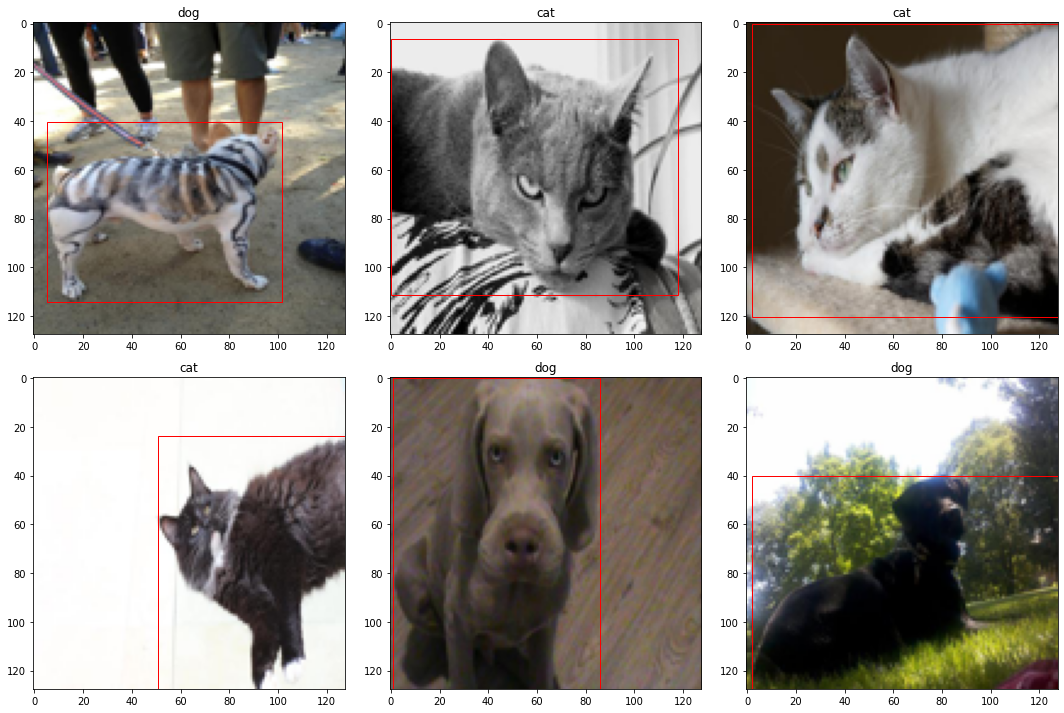

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(X.shape[0], size = 6, replace = False)):
    coords = y_bbox[j] * 128
    ax[i].imshow(X[j].reshape(128, 128, 3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2] - coords[0], coords[3] - coords[1], 
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

## Homegrown Linear and Logistic Regression Models

Before moving on to using PyTorch, we will first implement some homegrown models made from scratch. The first model will be a homegrown linear regression model that extends the MSE loss function from one target to the four targets (the bounding box coordinates). The second model will be homegrown logistic regression model that extends the loss function from CXE to CXE + MSE. That is, the model uses a complex multitask loss function where the resulting model predicts the class and bounding box coordinates at the same time.

### Homegrown Linear Regression

Sampling Data

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.25
subsample_rate = 0.25

# Subsample the train and test sets to use only 25% of the samples
X_train_bbox_s, _, y_train_bbox_s, _ = train_test_split(X_train_bbox, y_train_bbox, train_size = subsample_rate, random_state = 42)
X_test_bbox_s, _, y_test_bbox_s, _ = train_test_split(X_test_bbox, y_test_bbox, train_size = subsample_rate, random_state = 42)

Standard Scaling Train Data

In [ ]:
scaler = StandardScaler()
X_train_bbox_s = scaler.fit_transform(X_train_bbox_s)

Running Model

In [ ]:
import numpy as np

# m_rows is batch size; 
# D_in is input dimension;
# D_out is output dimension.
m_rows, D_in, D_out = 2593, 49152, 4
#m_rows, D_in, D_out = 64, 1000, 1

np.random.seed(seed=42) #fix the seed
# Create random input and output data
X_train = X_train_bbox_s
y_train = np.reshape(y_train_bbox_s, (y_train_bbox_s.shape[0],4))

# Randomly initialize weights
W1 = np.random.randn(D_in, D_out) #[w0, w1, w2, ...w999]
MSEs = []
learning_rate = 9e-5
loss = 9999
epoch=1
while loss > 50:  #Gradient descent
    # Forward pass: compute predicted y
    y_pred = X_train.dot(W1)
    #y_pred = X_train @ W1 

    # Compute and print loss
    loss = np.square(y_pred - y_train).mean()
    MSEs.append(loss)
    if(epoch %100 == 0 or (epoch == 1)):
        print(f"Epoch:{epoch}, MSE: {loss:.3f}")

    # Backprop to compute gradients of w1 and w2 with respect to loss
    err = 2.0 * (y_pred - y_train)
    grad_W1 = X_train.T.dot(err)/m_rows  #weighted sum of the train data

    # Update weights via gradient descent
    W1 -= learning_rate * grad_W1
    #print (f"Gradient Vector: {np.round(grad_W1, 3)}   Model:{W1}")
    epoch +=1
print (np.round(W1, 3)) 

Epoch:1, MSE: 48701.301
Epoch:100, MSE: 5924.592
Epoch:200, MSE: 4214.566
Epoch:300, MSE: 3338.797
Epoch:400, MSE: 2785.068
Epoch:500, MSE: 2396.874
Epoch:600, MSE: 2106.696
Epoch:700, MSE: 1880.048
Epoch:800, MSE: 1697.286
Epoch:900, MSE: 1546.301
Epoch:1000, MSE: 1419.178
Epoch:1100, MSE: 1310.493
Epoch:1200, MSE: 1216.390
Epoch:1300, MSE: 1134.046
Epoch:1400, MSE: 1061.337
Epoch:1500, MSE: 996.633
Epoch:1600, MSE: 938.660
Epoch:1700, MSE: 886.408
Epoch:1800, MSE: 839.061
Epoch:1900, MSE: 795.955
Epoch:2000, MSE: 756.543
Epoch:2100, MSE: 720.370
Epoch:2200, MSE: 687.052
Epoch:2300, MSE: 656.266
Epoch:2400, MSE: 627.737
Epoch:2500, MSE: 601.227
Epoch:2600, MSE: 576.532
Epoch:2700, MSE: 553.475
Epoch:2800, MSE: 531.901
Epoch:2900, MSE: 511.674
Epoch:3000, MSE: 492.674
Epoch:3100, MSE: 474.796
Epoch:3200, MSE: 457.946
Epoch:3300, MSE: 442.040
Epoch:3400, MSE: 427.004
Epoch:3500, MSE: 412.769
Epoch:3600, MSE: 399.276
Epoch:3700, MSE: 386.471
Epoch:3800, MSE: 374.304
Epoch:3900, MSE: 362.

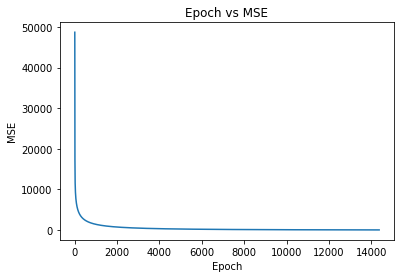

In [ ]:
plt.plot(MSEs)
plt.title('Epoch vs MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

Predicting MSE for Test Data

In [ ]:
scaler = StandardScaler()
X_test_bbox_s = scaler.fit_transform(X_test_bbox_s)
y_test_bbox_s = np.reshape(y_test_bbox_s, (y_test_bbox_s.shape[0],4))

In [ ]:
y_pred = X_test_bbox_s.dot(W1)
loss = np.square(y_pred - y_test_bbox_s).mean()
print('MSE for test data: {}'.format(loss))

MSE for test data: 2594.261852958771


LR using Computational graphs and autograd via the `Sequential` wrapper  module

In [ ]:
import torch
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# D_out is output dimension.
m_rows, D_in, D_out = 2593, 49152, 4

torch.manual_seed(42)
# Create random Tensors to hold input and outputs, and wrap them in Variables.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Variables during the backward pass.
# X_train = torch.randn((m_rows, D_in), requires_grad=False) #use (m_rows, D_in) or m_rows, D_in
# Y_train = torch.randn(m_rows, D_out, requires_grad=False)

X_train = torch.from_numpy(X_train_bbox_s).float()
y_train = torch.from_numpy(np.reshape(y_train_bbox_s, (y_train_bbox_s.shape[0],4))).float()

# Create random Tensors for weights, and wrap them in Variables.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
# NOT Need as we are using the nn package
#  W1 = torch.randn(D_in, D_out,  requires_grad=True)

# Use the nn package to define our model and loss function.
# use the sequential API makes things simple
model = torch.nn.Sequential(  #  X_train @ W1
    torch.nn.Linear(D_in, D_out),   # X.matmul(W1)
)
# loss scaffolding layer
loss_fn = torch.nn.MSELoss(size_average=True)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate =9e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
torch_MSEs = []
for epoch in range(51):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X_train)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_train)
    torch_MSEs.append(loss)
    if epoch % 10 == 0:
         print(f"Epoch:{epoch}, MSE: {loss.item():.9}")

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

   
print(model)
#summary(model, (D_in,))

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch:0, MSE: 0.660363436
Epoch:10, MSE: 0.671745896
Epoch:20, MSE: 0.545224309
Epoch:30, MSE: 0.507335961
Epoch:40, MSE: 0.478497446
Epoch:50, MSE: 0.466037005
Sequential(
  (0): Linear(in_features=49152, out_features=4, bias=True)
)


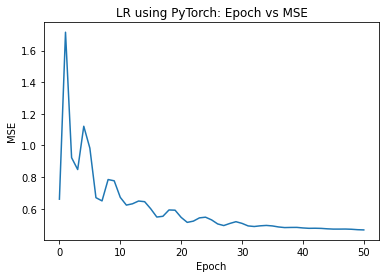

In [ ]:
plt.plot(torch_MSEs)
plt.title('LR using PyTorch: Epoch vs MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

Test MSE for PyTorch LR

In [ ]:
# X_test_bbox_s = scaler.fit_transform(X_test_bbox_s)
# y_test_bbox_s = np.reshape(y_test_bbox_s, (y_test_bbox_s.shape[0],4))
X_test_s_torch = torch.from_numpy(X_test_bbox_s)
Y_test_s_torch = torch.from_numpy(y_test_bbox_s)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#print(X_test_s_torch.shape)
test_size = 0 
running_loss = 0.0
batch_size=32
for i in range(X_test_s_torch.shape[0]):
    
    inputs, target = X_test_s_torch[0].to(device), Y_test_s_torch[0].to(device)
    # do forward pass
    output = model(inputs.float())

    # compute loss and gradients
    loss = loss_fn(output, torch.unsqueeze(target.float(), dim=1))
    # print statistics
    running_loss += loss.item()
    
    test_size +=batch_size
print(f" TEST  MSE loss: {np.round(running_loss/test_size, 3)}")

 TEST  MSE loss: 0.018


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Homegrown Logistic Regression

In [ ]:
from sklearn.metrics import mean_squared_error
class LogisticRegressionHomegrown:
    
    def __init__(self, X, learning_rate=0.001,num_iters=1000):
        self.lr= learning_rate
        self.num_iters=num_iters
        
        self.m,self.n=X.shape
    
    # public API for fitting a linear regression model
    def fit(self, X, y):
        y = np.reshape(y,(y.shape[0],1))
        
        
        self.weights=np.zeros((self.n,1))
        self.bias=0
        lamb=0.1
        cxe=[]
        mse=[]
        cxe_mse=[]
        
        for i in range(self.num_iters+1):
            y_pred= self.sigmoid(np.dot(X,self.weights)+self.bias)
        
            cost=[(-1/self.n * np.sum(y * np.log(y_pred + 10**-8) + (1-y) * np.log(1-y_pred + 10**-8))),mean_squared_error(y,y_pred)]

            #backprop
            #dw = 1/self.n * np.dot(X.T,y_pred-y)
            dw = 1/self.n * np.dot(X.T,y_pred-y) 

            db = 1/self.n * np.sum(y_pred-y)

            #gradient update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
            if i % 100 == 0:
                cxe.append(cost[0])
                mse.append(cost[1])
                cxe_mse.append(cost[0]+cost[1])
                print("After {0}th iteration: CXE:{1} ,MSE: {2},CXE + MSE: {3}".format(i,cost[0],cost[1],cost[0]+cost[1]))

        return self.weights,self.bias,cxe,mse,cxe_mse
    
    # predicts class for each object in X
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X,self.weights) + self.bias)
        
        class_pred = []
        class_pred = [1 if i > 0.5 else 0 for i in y_pred]
        
        return y_pred, class_pred
     
    def predict_probabs(self, X):
        y_pred = self.sigmoid(np.dot(X,self.weights) + self.bias)
        return y_pred
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z)) 

    # classification accuracy and regression mse combined
    def accuracy(self,y, y_pred):    
        class_pred = [1 if i > 0.5 else 0 for i in y_pred]
        accuracy = np.sum(y == class_pred) / len(y)    
        mse = sum((y - y_pred)**2) / len(y)    
        return accuracy, mse

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (80% train, 20% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.2, random_state = 42)

# Set the subsample rate to 0.25
subsample_rate = 0.25

# Subsample the train and test sets to use only 25% of the samples
X_train_label_s, _, y_train_label_s, _ = train_test_split(X_train_label, y_train_label, stratify = y_train_label, train_size = subsample_rate, random_state = 42)
X_test_label_s, _, y_test_label_s, _ = train_test_split(X_test_label, y_test_label, stratify = y_test_label, train_size = subsample_rate, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_label_s = scaler.fit_transform(X_train_label_s)

In [ ]:
lr=LogisticRegressionHomegrown(X_train_label_s) 
w,b,cxe,mse,cxe_mse=lr.fit(X_train_label_s,y_train_label_s)

After 0th iteration: CXE:0.03656678441023638 ,MSE: 0.25,CXE + MSE: 0.28656678441023636
After 100th iteration: CXE:0.03551745695192544 ,MSE: 0.2401636575188566,CXE + MSE: 0.27568111447078203
After 200th iteration: CXE:0.03503874129702523 ,MSE: 0.2357602973098611,CXE + MSE: 0.2707990386068863
After 300th iteration: CXE:0.03467077183627969 ,MSE: 0.23240369650142426,CXE + MSE: 0.26707446833770393
After 400th iteration: CXE:0.03435871612775564 ,MSE: 0.22957562777419252,CXE + MSE: 0.26393434390194814
After 500th iteration: CXE:0.03408255053723319 ,MSE: 0.22708658876196672,CXE + MSE: 0.26116913929919994
After 600th iteration: CXE:0.0338316873087009 ,MSE: 0.22483607677755035,CXE + MSE: 0.25866776408625125
After 700th iteration: CXE:0.03359975769456364 ,MSE: 0.2227636189619512,CXE + MSE: 0.2563633766565149
After 800th iteration: CXE:0.03338266393824481 ,MSE: 0.22083036182349128,CXE + MSE: 0.2542130257617361
After 900th iteration: CXE:0.03317763703845017 ,MSE: 0.21901010830527215,CXE + MSE: 0.25

In [ ]:
w

array([[-1.50713681e-04],
       [ 8.33848643e-05],
       [ 3.19312536e-04],
       ...,
       [-2.09851482e-04],
       [-3.39760318e-05],
       [-4.07818842e-04]])

In [ ]:
b

0.001443531688374676

Text(0, 0.5, 'CXE + MSE')

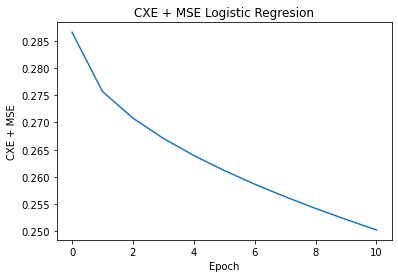

In [ ]:
plt.plot(cxe_mse)
plt.title('CXE + MSE Logistic Regresion')
plt.xlabel('Epoch')
plt.ylabel('CXE + MSE')

In [ ]:
#train Accuracy and MSE
y_pred_train=lr.predict_probabs(X_train_label_s)
y_pred_new_train = np.reshape(y_pred_train,(y_pred_train.shape[0]))
#print(y_pred_new.shape)
#print(y_train_label_s.shape)
acc,mse=lr.accuracy(y_train_label_s,y_pred_new_train )
print('train accuracy:{0}, MSE:{1}'.format(acc,mse))

#test Accuracy and MSE
y_pred_test=lr.predict_probabs(X_test_label_s)
y_pred_new_test = np.reshape(y_pred_test,(y_pred_test.shape[0]))
#print(y_pred_new.shape)
#print(y_train_label_s.shape)
acc,mse=lr.accuracy(y_test_label_s,y_pred_new_test )
print('test accuracy:{0}, MSE:{1}'.format(acc,mse))

train accuracy:0.6694947936752796, MSE:0.21726761558081475
test accuracy:0.5570987654320988, MSE:0.4344874869060764


## PyTorch Models

We can now look into PyTorch models to see how neural networks perform on the data.

In order to help improve the results of classification for some of the models, we will use the same `GrayScaleTransformer` and `HogTransformer` functions from Phase 1 of the project. The image processing technique that is chosen here is called histogram of oriented gradients, or HOG for short. HOG is a feature descriptor used in computer vision and image processing for the purpose of object detection and it works by counting occurrences of gradient orientation in localized portions of an image. This method is similar to that of edge orientation histograms but differs in that it is computed on a dense grid of uniformly spaced cells and uses overlapping local contrast normalization for improved accuracy, according to Wikipedia.

Before HOG can be used, the images need to be converted into grayscale as well. The below classes are custom defined Transformer functions that perform the grayscale conversion of the images and then perform the HOG image processing using the `skimage` package. These Transformer classes can be used to fit and transform data. The HOG image processing uses mostly default settings provided by the package.

In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.base import BaseEstimator, TransformerMixin
import skimage

class GrayScaleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return np.array([rgb2gray(image.reshape(128, 128, 3)) for image in X])
    
class HogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, orientations = 8, pixels_per_cell = (8, 8), cells_per_block = (3, 3), block_norm = 'L2-Hys', y = None):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
        self.y = y
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        def hog_function(image):
            return skimage.feature.hog(image, orientations = self.orientations, pixels_per_cell = self.pixels_per_cell,
                                       cells_per_block = self.cells_per_block, block_norm = self.block_norm, feature_vector = True)
        
        return np.array([hog_function(image) for image in X])

For PyTorch, training and evaluating the model is almost the same no matter what the underlying network model is, and therefore we will define a `train` function and an `evaluate` function that will be used by both our baseline and multilayer perceptron PyTorch models for classification and regression. The comments in the code provide information on what each step does.

In [ ]:
def train(epoch, model, train_loader, criterion, optimizer, device, is_classifier, verbose):
    # Define variables to keep track of the running loss and the number of correct classficiations
    running_loss = 0.0
    correct = 0
    total = 0

    # Set the model in training mode
    model.train()

    print('-'*10, f'Epoch {epoch}', '-'*10)

    # Iterate through all of the batches in the DataLoader object
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Send the inputs and targets to the appropriate device
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Compute the model output
        y_pred = model(inputs)

        # Calculate the model loss function
        loss = criterion(y_pred, targets)

        # Backpropagate the loss through the network
        loss.backward()

        # Update the model weights
        optimizer.step()

        # Add the loss for this batch to the running total loss
        running_loss += loss.item()

        # If the model is a classifier, then we want to keep track of the number of correct classifications
        if is_classifier:
            _, pred = torch.max(y_pred, dim = 1)
            correct += torch.sum(pred == targets).item()
            total += targets.size(0)

        # If verbose is true, then output the loss for each 20 batches
        if batch_idx % 20 == 0 and verbose:
            print(f'Batch {batch_idx} Loss: {loss.item():.3f}')
    
    # Find the mean loss across all batches
    loss = running_loss / len(train_loader)
    
    # If the model is a classifier, print out the average loss and accuracy and return those values
    if is_classifier:
        acc = 100 * correct / total
        print(f'Train Loss: {loss:.3f} | Train Accuracy: {acc:.3f}%')
        return loss, acc

    # If the model is not a classifier, print out just the average loss and return that value
    else:
        print(f'Train Loss: {loss:.3f}')
        return loss

def evaluate(model, data_loader, criterion, device, tag, is_classifier):
    # Define variables to keep track of the running loss and the number of correct classficiations
    running_loss = 0.0
    correct = 0
    total = 0

    # Set the model in evaluation mode
    model.eval()

    # torch.no_grad() ensures that gradients are not calculated for whatever is inside the with statement
    with torch.no_grad():

        # Iterate through all of the batches in the DataLoader object
        for batch_idx, (inputs, targets) in enumerate(data_loader):
            # Send the inputs and targets to the appropriate device
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Compute the model output
            y_pred = model(inputs)

            # Calculate the model loss function
            loss = criterion(y_pred, targets)

            # Add the loss for this batch to the running total loss
            running_loss += loss.item()

            # If the model is a classifier, then we want to keep track of the number of correct classifications
            if is_classifier:
                _, pred = torch.max(y_pred, dim = 1)
                correct += torch.sum(pred == targets).item()
                total += targets.size(0)

     # Find the mean loss across all batches
    loss = running_loss / len(data_loader)

    # If the model is a classifier, print out the average loss and accuracy and return those values
    if is_classifier:
        acc = 100 * correct / total
        print(f'{tag} Loss: {loss:.3f} | {tag} Accuracy: {acc:.3f}%\n')
        return loss, acc

    # If the model is not a classifier, print out just the average loss and return that value
    else:
        print(f'{tag} Loss: {loss:.3f}\n')
        return loss

Finally, let's define a Pandas DataFrame to keep track of the loss and accuracies of each model that we create with PyTorch.

In [ ]:
pytorch_model_results = pd.DataFrame(columns = ['Model',
                                                'Loss Function',
                                                'Total Epochs',
                                                'Train Loss',
                                                'Val Loss',
                                                'Test Loss',
                                                'Train Acc',
                                                'Val Acc',
                                                'Test Acc'])
pytorch_model_results

Empty DataFrame
Columns: [Model, Loss Function, Total Epochs, Train Loss, Val Loss, Test Loss, Train Acc, Val Acc, Test Acc]
Index: []

### Baseline PyTorch Classification Model
We will start with a baseline classification model using PyTorch. First, let's create the training, validation, and test data.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (85% train, 15% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.15, random_state = 42)

# Split the train data into train and validation sets (15% validation)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size = 0.15, random_state = 42)

Let's check the shapes of each of the variables defined above to ensure they have consistent features.

In [ ]:
print('X_train_label:', X_train_label.shape)
print('X_val_label:', X_val_label.shape)
print('X_test_label:', X_test_label.shape)
print('y_train_label:', y_train_label.shape)
print('y_val_label:', y_val_label.shape)
print('y_test_label:', y_test_label.shape)

X_train_label: (9367, 49152)
X_val_label: (1654, 49152)
X_test_label: (1945, 49152)
y_train_label: (9367,)
y_val_label: (1654,)
y_test_label: (1945,)


Let's scale the data using `MinMaxScaler` so that all features have consistent contribution towards the model fit. We fit the scaling to the training dataset and then use the fitted scaling to transform all three.

In [ ]:
scaler = MinMaxScaler()
X_train_label = scaler.fit_transform(X_train_label)
X_val_label = scaler.transform(X_val_label)
X_test_label = scaler.transform(X_test_label)

Since we are using PyTorch, we need convert the numpy arrays into torch tensors. The inputs must be floats and the targets must be longs for classification.

In [ ]:
X_train_tensor = torch.from_numpy(X_train_label).float()
y_train_tensor = torch.from_numpy(y_train_label).long()
X_val_tensor = torch.from_numpy(X_val_label).float()
y_val_tensor = torch.from_numpy(y_val_label).long()
X_test_tensor = torch.from_numpy(X_test_label).float()
y_test_tensor = torch.from_numpy(y_test_label).long()

Now, we can define `TensorDataset` and `DataLoader` objects that will be used in the PyTorch data. The `DataLoader` object automatically creates shuffled batches of a particular size for the model to use during optimization.

In [ ]:
train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_ds = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 512, shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = 512, shuffle = False, num_workers = 2)

Now let's run a PyTorch model. The code below creates a model using the Sequential API and then performs training and evaluation with 50 epochs.

In [ ]:
%%time
# Set the PyTorch seed for consistent results
torch.manual_seed(42)

# Create a model using the Sequential API along with the criterion and optimizer that will be used
model_label = torch.nn.Sequential(torch.nn.Linear(128 * 128 * 3, 32), torch.nn.ReLU(), torch.nn.Linear(32, 2))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_label.parameters(), lr = 0.0001)

# Send the model and criterion to the device
model_label = model_label.to(device)
criterion = criterion.to(device)

# Create lists that will store the history of the losses and accuracies
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Perform training on the training set and evaluation on the validation set for 50 epochs
for epoch in range(50):
    loss, acc = train(epoch, model_label, train_loader, criterion, optimizer, device, True, False)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = evaluate(model_label, val_loader, criterion, device, '  Val', True)
    val_loss.append(loss)
    val_acc.append(acc)

---------- Epoch 0 ----------
Train Loss: 0.709 | Train Accuracy: 52.642%
  Val Loss: 0.694 |   Val Accuracy: 51.814%

---------- Epoch 1 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.694 |   Val Accuracy: 51.814%

---------- Epoch 2 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.694 |   Val Accuracy: 51.814%

---------- Epoch 3 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.694 |   Val Accuracy: 51.814%

---------- Epoch 4 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.693 |   Val Accuracy: 51.814%

---------- Epoch 5 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.693 |   Val Accuracy: 51.814%

---------- Epoch 6 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.693 |   Val Accuracy: 51.814%

---------- Epoch 7 ----------
Train Loss: 0.692 | Train Accuracy: 52.877%
  Val Loss: 0.693 |   Val Accuracy: 51.814%

---------- Epoch 8 ----------
Train Loss: 0.692 

We can now plot the train and validation loss and accuracy curves with respect to the number of epochs.

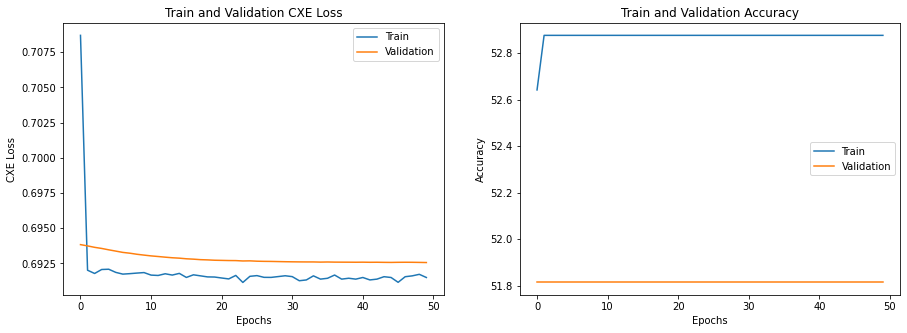

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].set_title('Train and Validation CXE Loss')
ax[0].plot(train_loss, label = 'Train')
ax[0].plot(val_loss, label = 'Validation')
ax[0].set(xlabel = 'Epochs', ylabel = 'CXE Loss')
ax[0].legend(loc = 'best')

ax[1].set_title('Train and Validation Accuracy')
ax[1].plot(train_acc, label = 'Train')
ax[1].plot(val_acc, label = 'Validation')
ax[1].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1].legend(loc = 'best')

plt.show()

Finally, let's compute the loss and accuracy on the test dataset to see how well the model generalizes.

In [ ]:
loss, acc = evaluate(model_label, test_loader, criterion, device, 'Test', True)

Test Loss: 0.690 | Test Accuracy: 53.728%



Let's save our results in the pandas `DataFrame`.

In [ ]:
pytorch_model_results.loc[len(pytorch_model_results)] = ['Baseline PyTorch Classification',
                                                         'CXE',
                                                         50,
                                                         round(train_loss[-1], 3),
                                                         round(val_loss[-1], 3),
                                                         round(loss, 3),
                                                         round(train_acc[-1], 3),
                                                         round(val_acc[-1], 3),
                                                         round(acc, 3)]
pytorch_model_results

Model Loss Function  ... Val Acc  Test Acc
0  Baseline PyTorch Classification           CXE  ...  51.814    53.728

[1 rows x 9 columns]

#### Results and Discussion
The baseline model performs fairly poorly on the dataset, and seems to not learn anything since the train accuracy just plateus at 52.877%. This is not unexpected since the neural network only has one hidden layer, which is likely not enough layers to properly learn from the features in the images. This model underfits since it is not able to learn.

### Baseline PyTorch Regression Model
Next we will go to a baseline regression model using PyTorch. First, let's create the training, validation, and test data.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (85% train, 15% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.15, random_state = 42)

# Split the train data into train and validation sets (15% validation)
X_train_bbox, X_val_bbox, y_train_bbox, y_val_bbox = train_test_split(X_train_bbox, y_train_bbox, test_size = 0.15, random_state = 42)

Let's check the shapes of each of the variables defined above to ensure they have consistent features.

In [ ]:
print('X_train_bbox:', X_train_bbox.shape)
print('X_val_bbox:', X_val_bbox.shape)
print('X_test_bbox:', X_test_bbox.shape)
print('y_train_bbox:', y_train_bbox.shape)
print('y_val_bbox:', y_val_bbox.shape)
print('y_test_bbox:', y_test_bbox.shape)

X_train_bbox: (9367, 49152)
X_val_bbox: (1654, 49152)
X_test_bbox: (1945, 49152)
y_train_bbox: (9367, 4)
y_val_bbox: (1654, 4)
y_test_bbox: (1945, 4)


Let's scale the data using `MinMaxScaler` so that all features have consistent contribution towards the model fit. We fit the scaling to the training dataset and then use the fitted scaling to transform all three.

In [ ]:
scaler = MinMaxScaler()
X_train_bbox = scaler.fit_transform(X_train_bbox)
X_val_bbox = scaler.transform(X_val_bbox)
X_test_bbox = scaler.transform(X_test_bbox)

Since we are using PyTorch, we need convert the numpy arrays into torch tensors. The inputs must be floats and the targets must be floats for regression.

In [ ]:
X_train_tensor = torch.from_numpy(X_train_bbox).float()
y_train_tensor = torch.from_numpy(y_train_bbox).float()
X_val_tensor = torch.from_numpy(X_val_bbox).float()
y_val_tensor = torch.from_numpy(y_val_bbox).float()
X_test_tensor = torch.from_numpy(X_test_bbox).float()
y_test_tensor = torch.from_numpy(y_test_bbox).float()

Now, we can define `TensorDataset` and `DataLoader` objects that will be used in the PyTorch data. The `DataLoader` object automatically creates shuffled batches of a particular size for the model to use during optimization.

In [ ]:
train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_ds = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 512, shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = 512, shuffle = False, num_workers = 2)

Now let's run a PyTorch model. The code below creates a model using the Sequential API and then performs training and evaluation with 50 epochs.

In [ ]:
%%time
# Set the PyTorch seed for consistent results
torch.manual_seed(42)

# Create a model using the Sequential API along with the criterion and optimizer that will be used
model_bbox = torch.nn.Sequential(torch.nn.Linear(X_train_bbox.shape[1], 32), torch.nn.ReLU(), torch.nn.Linear(32, 4))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_bbox.parameters(), lr = 0.0001)

# Send the model and criterion to the device
model_bbox = model_bbox.to(device)
criterion = criterion.to(device)

# Create lists that will store the history of the losses
train_loss = []
val_loss = []

# Perform training on the training set and evaluation on the validation set for 50 epochs
for epoch in range(50):
    loss = train(epoch, model_bbox, train_loader, criterion, optimizer, device, False, False)
    train_loss.append(loss)

    loss = evaluate(model_bbox, val_loader, criterion, device, '  Val', False)
    val_loss.append(loss)

---------- Epoch 0 ----------
Train Loss: 0.108
  Val Loss: 0.054

---------- Epoch 1 ----------
Train Loss: 0.044
  Val Loss: 0.041

---------- Epoch 2 ----------
Train Loss: 0.037
  Val Loss: 0.036

---------- Epoch 3 ----------
Train Loss: 0.036
  Val Loss: 0.037

---------- Epoch 4 ----------
Train Loss: 0.035
  Val Loss: 0.036

---------- Epoch 5 ----------
Train Loss: 0.034
  Val Loss: 0.036

---------- Epoch 6 ----------
Train Loss: 0.034
  Val Loss: 0.035

---------- Epoch 7 ----------
Train Loss: 0.034
  Val Loss: 0.035

---------- Epoch 8 ----------
Train Loss: 0.033
  Val Loss: 0.035

---------- Epoch 9 ----------
Train Loss: 0.033
  Val Loss: 0.036

---------- Epoch 10 ----------
Train Loss: 0.032
  Val Loss: 0.035

---------- Epoch 11 ----------
Train Loss: 0.033
  Val Loss: 0.033

---------- Epoch 12 ----------
Train Loss: 0.032
  Val Loss: 0.033

---------- Epoch 13 ----------
Train Loss: 0.032
  Val Loss: 0.033

---------- Epoch 14 ----------
Train Loss: 0.031
  Val Los

We can now plot the train and validation loss with respect to the number of epochs.

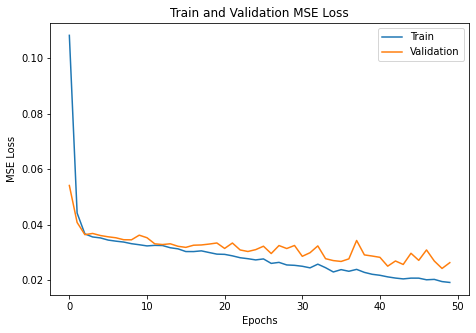

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7.5, 5))

ax.set_title('Train and Validation MSE Loss')
ax.plot(train_loss, label = 'Train')
ax.plot(val_loss, label = 'Validation')
ax.set(xlabel = 'Epochs', ylabel = 'MSE Loss')
ax.legend(loc = 'best')

plt.show()

Finally, let's compute the loss on the test dataset to see how well the model generalizes.

In [ ]:
loss = evaluate(model_bbox, test_loader, criterion, device, 'Test', False)

Test Loss: 0.026



Let's save our results in the pandas `DataFrame`.

In [ ]:
pytorch_model_results.loc[len(pytorch_model_results)] = ['Baseline PyTorch Regression',
                                                         'MSE',
                                                         50,
                                                         round(train_loss[-1], 3),
                                                         round(val_loss[-1], 3),
                                                         round(loss, 3),
                                                         '-',
                                                         '-',
                                                         '-']
pytorch_model_results

Model Loss Function  ... Val Acc  Test Acc
0  Baseline PyTorch Regression           MSE  ...       -         -

[1 rows x 9 columns]

#### Results and Discussion
This model performs reasonably well, though there is some evidence of overfitting at the later epochs. Overall, the model seems to have learned enough to make some good predictions on the bounding box coordinates, but it seems as though the learning rate may be too high here since the loss decreases very rapidly at the beginning.

### Multilayer Perceptron Classification Model
Now that the baseline models have been trained and evaluated, we move on to a more complicated neural network: the multilayer perceptron. For this, we will use more than just one hidden layer, and we will incorporate other neural network features such as Dropout and BatchNorm. The following code is very similar to before, except that this time the data is transformed using the `GrayScaleTransformer` and `HogTransformer` in an attempt to extract useful features from the images.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (85% train, 15% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.15, random_state = 42)

# Split the train data into train and validation sets (15% validation)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size = 0.15, random_state = 42)

print('X_train_label:', X_train_label.shape)
print('X_val_label:', X_val_label.shape)
print('X_test_label:', X_test_label.shape)
print('y_train_label:', y_train_label.shape)
print('y_val_label:', y_val_label.shape)
print('y_test_label:', y_test_label.shape)

gray = GrayScaleTransformer()
X_train_label = gray.fit_transform(X_train_label)
X_val_label = gray.transform(X_val_label)
X_test_label = gray.transform(X_test_label)

hog = HogTransformer()
X_train_label = hog.fit_transform(X_train_label)
X_val_label = hog.transform(X_val_label)
X_test_label = hog.transform(X_test_label)

scaler = MinMaxScaler()
X_train_label = scaler.fit_transform(X_train_label)
X_val_label = scaler.transform(X_val_label)
X_test_label = scaler.transform(X_test_label)

print('X_train_label after Hog transformation:', X_train_label.shape)
print('X_val_label after Hog transformation:', X_val_label.shape)
print('X_test_label after Hog transformation:', X_test_label.shape)

X_train_tensor = torch.from_numpy(X_train_label).float()
y_train_tensor = torch.from_numpy(y_train_label).long()
X_val_tensor = torch.from_numpy(X_val_label).float()
y_val_tensor = torch.from_numpy(y_val_label).long()
X_test_tensor = torch.from_numpy(X_test_label).float()
y_test_tensor = torch.from_numpy(y_test_label).long()

train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_ds = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 512, shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = 512, shuffle = False, num_workers = 2)

X_train_label: (9367, 49152)
X_val_label: (1654, 49152)
X_test_label: (1945, 49152)
y_train_label: (9367,)
y_val_label: (1654,)
y_test_label: (1945,)
X_train_label after Hog transformation: (9367, 14112)
X_val_label after Hog transformation: (1654, 14112)
X_test_label after Hog transformation: (1945, 14112)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Now let's run the Multilayer Perceptron PyTorch classification model. The code below creates a model using the Sequential API and then performs training and evaluation with 50 epochs.

In [ ]:
%%time
# Set the PyTorch seed for consistent results
torch.manual_seed(42)

# Create a model using the Sequential API along with the criterion and optimizer that will be used
model_label = torch.nn.Sequential(torch.nn.Linear(14112, 128),
                                  torch.nn.BatchNorm1d(128),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(128, 64),
                                  torch.nn.BatchNorm1d(64),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(64, 2))
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_label.parameters(), lr = 0.00001)

# Send the model and criterion to the device
model_label = model_label.to(device)
criterion = criterion.to(device)

# Create lists that will store the history of the losses and accuracies
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Perform training on the training set and evaluation on the validation set for 50 epochs
for epoch in range(50):
    loss, acc = train(epoch, model_label, train_loader, criterion, optimizer, device, True, False)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = evaluate(model_label, val_loader, criterion, device, '  Val', True)
    val_loss.append(loss)
    val_acc.append(acc)

---------- Epoch 0 ----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Loss: 0.735 | Train Accuracy: 52.674%
  Val Loss: 0.660 |   Val Accuracy: 61.548%

---------- Epoch 1 ----------
Train Loss: 0.700 | Train Accuracy: 56.923%
  Val Loss: 0.643 |   Val Accuracy: 63.301%

---------- Epoch 2 ----------
Train Loss: 0.668 | Train Accuracy: 60.724%
  Val Loss: 0.634 |   Val Accuracy: 64.510%

---------- Epoch 3 ----------
Train Loss: 0.654 | Train Accuracy: 62.208%
  Val Loss: 0.631 |   Val Accuracy: 64.571%

---------- Epoch 4 ----------
Train Loss: 0.647 | Train Accuracy: 63.553%
  Val Loss: 0.627 |   Val Accuracy: 64.873%

---------- Epoch 5 ----------
Train Loss: 0.634 | Train Accuracy: 64.065%
  Val Loss: 0.624 |   Val Accuracy: 64.994%

---------- Epoch 6 ----------
Train Loss: 0.624 | Train Accuracy: 65.261%
  Val Loss: 0.624 |   Val Accuracy: 64.813%

---------- Epoch 7 ----------
Train Loss: 0.607 | Train Accuracy: 66.414%
  Val Loss: 0.623 |   Val Accuracy: 64.510%

---------- Epoch 8 ----------
Train Loss: 0.607 | Train Accuracy: 66.958%
  Va

We can now plot the train and validation loss and accuracy curves with respect to the number of epochs.

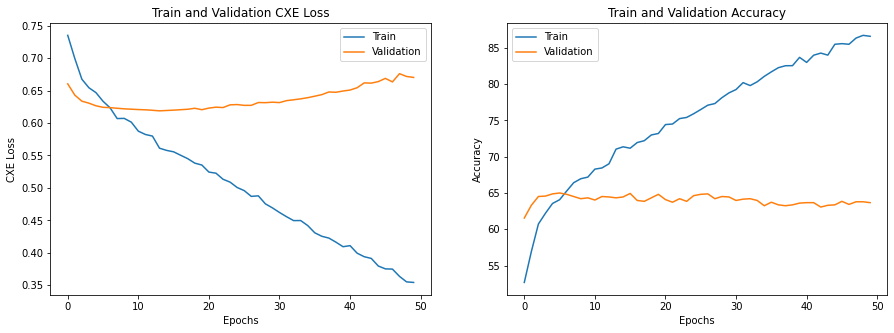

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].set_title('Train and Validation CXE Loss')
ax[0].plot(train_loss, label = 'Train')
ax[0].plot(val_loss, label = 'Validation')
ax[0].set(xlabel = 'Epochs', ylabel = 'CXE Loss')
ax[0].legend(loc = 'best')

ax[1].set_title('Train and Validation Accuracy')
ax[1].plot(train_acc, label = 'Train')
ax[1].plot(val_acc, label = 'Validation')
ax[1].set(xlabel = 'Epochs', ylabel = 'Accuracy')
ax[1].legend(loc = 'best')

plt.show()

Finally, let's compute the loss and accuracy on the test dataset to see how well the model generalizes.

In [ ]:
loss, acc = evaluate(model_label, test_loader, criterion, device, 'Test', True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test Loss: 0.655 | Test Accuracy: 64.473%



Let's save our results in the pandas `DataFrame`.

In [ ]:
pytorch_model_results.loc[len(pytorch_model_results)] = ['MLP PyTorch Classification',
                                                         'CXE',
                                                         50,
                                                         round(train_loss[-1], 3),
                                                         round(val_loss[-1], 3),
                                                         round(loss, 3),
                                                         round(train_acc[-1], 3),
                                                         round(val_acc[-1], 3),
                                                         round(acc, 3)]
pytorch_model_results

Model Loss Function  ... Val Acc  Test Acc
0  MLP PyTorch Classification           CXE  ...  63.664    64.473

[1 rows x 9 columns]

#### Results and Discussion
This model is achieving a sizable increase in the generalization accuracy with 64.473% on the test set compared to the baseline 53.728%. Unfortunately, the model overfits significantly at the later epochs; thus, the best model that could be extracted from the training would occur around epoch 9.

### Multilayer Perceptron Regression Model
Next, let's create a multilayer perceptron regression model. For this, we will use more than just one hidden layer, and we will incorporate other neural network features such as Dropout and BatchNorm. The following code is very similar to before, except that this time the data is transformed using the `GrayScaleTransformer` and `HogTransformer` in an attempt to extract useful features from the images.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (85% train, 15% test)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.15, random_state = 42)

# Split the train data into train and validation sets (15% validation)
X_train_bbox, X_val_bbox, y_train_bbox, y_val_bbox = train_test_split(X_train_bbox, y_train_bbox, test_size = 0.15, random_state = 42)

print('X_train_bbox:', X_train_bbox.shape)
print('X_val_bbox:', X_val_bbox.shape)
print('X_test_bbox:', X_test_bbox.shape)
print('y_train_bbox:', y_train_bbox.shape)
print('y_val_bbox:', y_val_bbox.shape)
print('y_test_bbox:', y_test_bbox.shape)

gray = GrayScaleTransformer()
X_train_bbox = gray.fit_transform(X_train_bbox)
X_val_bbox = gray.transform(X_val_bbox)
X_test_bbox = gray.transform(X_test_bbox)

hog = HogTransformer()
X_train_bbox = hog.fit_transform(X_train_bbox)
X_val_bbox = hog.transform(X_val_bbox)
X_test_bbox = hog.transform(X_test_bbox)

scaler = MinMaxScaler()
X_train_bbox = scaler.fit_transform(X_train_bbox)
X_val_bbox = scaler.transform(X_val_bbox)
X_test_bbox = scaler.transform(X_test_bbox)

print('X_train_bbox after Hog transformation:', X_train_bbox.shape)
print('X_val_bbox after Hog transformation:', X_val_bbox.shape)
print('X_test_bbox after Hog transformation:', X_test_bbox.shape)

X_train_tensor = torch.from_numpy(X_train_bbox).float()
y_train_tensor = torch.from_numpy(y_train_bbox).float()
X_val_tensor = torch.from_numpy(X_val_bbox).float()
y_val_tensor = torch.from_numpy(y_val_bbox).float()
X_test_tensor = torch.from_numpy(X_test_bbox).float()
y_test_tensor = torch.from_numpy(y_test_bbox).float()

train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_ds = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size = 128, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 512, shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = 512, shuffle = False, num_workers = 2)

X_train_bbox: (9367, 49152)
X_val_bbox: (1654, 49152)
X_test_bbox: (1945, 49152)
y_train_bbox: (9367, 4)
y_val_bbox: (1654, 4)
y_test_bbox: (1945, 4)
X_train_bbox after Hog transformation: (9367, 14112)
X_val_bbox after Hog transformation: (1654, 14112)
X_test_bbox after Hog transformation: (1945, 14112)


Now let's run the Multilayer Perceptron PyTorch regression model. The code below creates a model using the Sequential API and then performs training and evaluation with 50 epochs.

In [ ]:
%%time
# Set the PyTorch seed for consistent results
torch.manual_seed(42)

# Create a model using the Sequential API along with the criterion and optimizer that will be used
model_bbox = torch.nn.Sequential(torch.nn.Linear(X_train_bbox.shape[1], 128),
                                 torch.nn.BatchNorm1d(128),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.5),
                                 torch.nn.Linear(128, 64),
                                 torch.nn.BatchNorm1d(64),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(0.5),
                                 torch.nn.Linear(64, 4))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_bbox.parameters(), lr = 0.0001)

# Send the model and criterion to the device
model_bbox = model_bbox.to(device)
criterion = criterion.to(device)

# Create lists that will store the history of the losses
train_loss = []
val_loss = []

# Perform training on the training set and evaluation on the validation set for 50 epochs
for epoch in range(50):
    loss = train(epoch, model_bbox, train_loader, criterion, optimizer, device, False, False)
    train_loss.append(loss)

    loss = evaluate(model_bbox, val_loader, criterion, device, '  Val', False)
    val_loss.append(loss)

---------- Epoch 0 ----------
Train Loss: 0.431
  Val Loss: 0.194

---------- Epoch 1 ----------
Train Loss: 0.310
  Val Loss: 0.137

---------- Epoch 2 ----------
Train Loss: 0.247
  Val Loss: 0.111

---------- Epoch 3 ----------
Train Loss: 0.207
  Val Loss: 0.089

---------- Epoch 4 ----------
Train Loss: 0.183
  Val Loss: 0.077

---------- Epoch 5 ----------
Train Loss: 0.158
  Val Loss: 0.068

---------- Epoch 6 ----------
Train Loss: 0.141
  Val Loss: 0.064

---------- Epoch 7 ----------
Train Loss: 0.126
  Val Loss: 0.060

---------- Epoch 8 ----------
Train Loss: 0.114
  Val Loss: 0.056

---------- Epoch 9 ----------
Train Loss: 0.102
  Val Loss: 0.054

---------- Epoch 10 ----------
Train Loss: 0.095
  Val Loss: 0.053

---------- Epoch 11 ----------
Train Loss: 0.086
  Val Loss: 0.052

---------- Epoch 12 ----------
Train Loss: 0.081
  Val Loss: 0.050

---------- Epoch 13 ----------
Train Loss: 0.073
  Val Loss: 0.046

---------- Epoch 14 ----------
Train Loss: 0.069
  Val Los

We can now plot the train and validation loss with respect to the number of epochs.

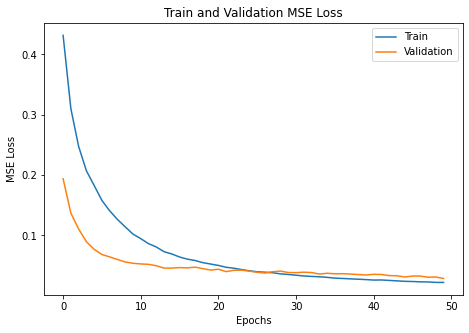

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7.5, 5))

ax.set_title('Train and Validation MSE Loss')
ax.plot(train_loss, label = 'Train')
ax.plot(val_loss, label = 'Validation')
ax.set(xlabel = 'Epochs', ylabel = 'MSE Loss')
ax.legend(loc = 'best')

plt.show()

Finally, let's compute the loss on the test dataset to see how well the model generalizes.

In [ ]:
loss = evaluate(model_bbox, test_loader, criterion, device, 'Test', False)

Test Loss: 0.028



Let's save our results in the pandas `DataFrame`.

In [ ]:
pytorch_model_results.loc[len(pytorch_model_results)] = ['MLP PyTorch Regression',
                                                         'MSE',
                                                         50,
                                                         round(train_loss[-1], 3),
                                                         round(val_loss[-1], 3),
                                                         round(loss, 3),
                                                         '-',
                                                         '-',
                                                         '-']
pytorch_model_results

Model Loss Function Total Epochs  ...  Train Acc  Val Acc  Test Acc
0  MLP PyTorch Regression           MSE           50  ...          -        -         -

[1 rows x 9 columns]

#### Results and Discussion
This models performs similarly to the baseline model, though seems to overfit much less and the loss curve looks very healthy.

### Multi-headed PyTorch Model (CXE + MSE)
The final PyTorch model that we will create is a multi-headed cat-dog detector using the OOP API in PyTorch. The loss function here is extended so that it includes both the MSE from the bounding box coordinates and the CXE with from the image labels.

First, we must split the data into training, validation, and testing sets. We must ensure that the splits are consistent across both the `y_label` data and the `y_bbox` data. We are using both here because we want to create a model that predicts both simultaneously.

In [ ]:
# Set the random seed to 42 to ensure consist results for multiple runs of the program
np.random.seed(42)

# Split the data into train and test sets (90% train, 10% test)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y_label, test_size = 0.10, random_state = 42)
X_train_bbox, X_test_bbox, y_train_bbox, y_test_bbox = train_test_split(X, y_bbox, test_size = 0.10, random_state = 42)

# Split the train data into train and validation sets (10% validation)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size = 0.10, random_state = 42)
X_train_bbox, X_val_bbox, y_train_bbox, y_val_bbox = train_test_split(X_train_bbox, y_train_bbox, test_size = 0.10, random_state = 42)

# Check to ensure the splits produced the same X data arrays between label and bbox
print(np.array_equal(X_train_label, X_train_bbox))
print(np.array_equal(X_val_label, X_val_bbox))
print(np.array_equal(X_test_label, X_test_bbox))

X_train = X_train_label
X_val = X_val_label
X_test = X_test_label

# Free up RAM
del X
del y_label
del y_bbox
del X_train_label
del X_val_label
del X_test_label
del X_train_bbox
del X_val_bbox
del X_test_bbox

print('X_train:', X_train.shape)
print('X_val:', X_val.shape)
print('X_test:', X_test.shape)
print('y_train_label:', y_train_label.shape)
print('y_val_label:', y_val_label.shape)
print('y_test_label:', y_test_label.shape)
print('y_train_bbox:', y_train_bbox.shape)
print('y_val_bbox:', y_val_bbox.shape)
print('y_test_bbox:', y_test_bbox.shape)

True
True
True
X_train: (10502, 49152)
X_val: (1167, 49152)
X_test: (1297, 49152)
y_train_label: (10502,)
y_val_label: (1167,)
y_test_label: (1297,)
y_train_bbox: (10502, 4)
y_val_bbox: (1167, 4)
y_test_bbox: (1297, 4)


Currently, the number of features is much greater than the numbert of samples. As a result, for this section, let's try performing data augmentation in order to increase the size of the training set. This should help the model not overfit too much in the long term. The code below takes in the data and augments it by performing two transformations: first, each image is copied and then a random guassian noise is applied to the image. This is important because we want the model be invariant to noise that is present in the images. We then append these noisy images to the original data. Second, we take all of the images so far (including the noisy ones), and we apply a horizontal flip to the images. The horizontal flip preserves the important features of the cats and the dogs, and the bounding boxes are updated to match the new images. With these transformations, we are quadrupling the number of images in the training set.

In [ ]:
def data_augmentation(X_train, y_train_label, y_train_bbox):
    X_noise = np.array([skimage.util.random_noise(img, var = 0.005) for img in X_train.reshape(-1, 128, 128, 3)]).reshape(-1, 49152)
    X_noise = (X_noise * 255).astype(int)
    X_output = np.r_[X_train, X_noise]
    y_label_output = np.r_[y_train_label, y_train_label]
    y_bbox_output = np.r_[y_train_bbox, y_train_bbox]
    
    gc.collect()

    X_flip = np.array([np.fliplr(img) for img in X_output.reshape(-1, 128, 128, 3)]).reshape(-1, 49152)
    y_bbox_flip = np.array([[1 - coords[0], coords[1], 1 - coords[2], coords[3]] for coords in y_bbox_output])
    X_output = np.r_[X_output, X_flip]
    y_label_output = np.r_[y_label_output, y_label_output]
    y_bbox_output = np.r_[y_bbox_output, y_bbox_flip]

    # Free up RAM
    del X_flip
    del y_bbox_flip
    del X_noise
    gc.collect()

    return X_output, y_label_output, y_bbox_output

We call the function `data_augmentation` here.

In [ ]:
X_train, y_train_label, y_train_bbox = data_augmentation(X_train, y_train_label, y_train_bbox)
print('X_train:', X_train.shape)
print('y_train_label:', y_train_label.shape)
print('y_train_bbox:', y_train_bbox.shape)
gc.collect()

Now, let's plot some images after the data augmentation process to compare the new pictures with the original ones. As can be seen, the noise looks like it has been properly added to the new images, and the image flips have also been performed correctly. The bounding box coordinates are also appropriately reflected on the images that have been horizontally flipped.

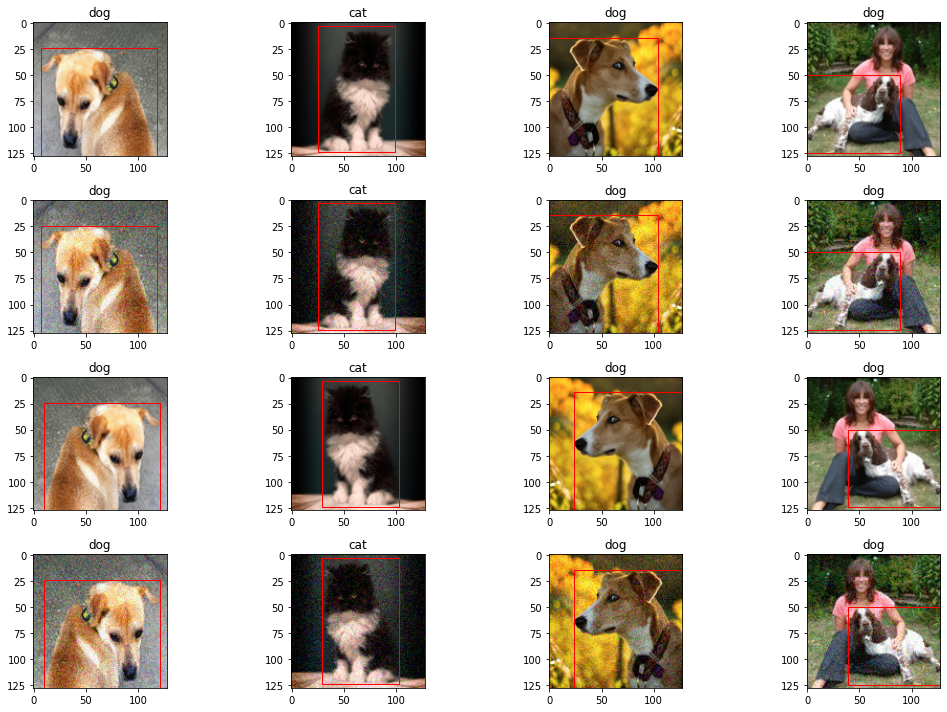

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate([0, 1, 2, 3, 10502, 10503, 10504, 10505, 10502 * 2, 10502 * 2 + 1, 10502 * 2 + 2, 10502 * 2 + 3, 10502 * 3, 10502 * 3 + 1, 10502 * 3 + 2, 10502 * 3 + 3]):
    coords = y_train_bbox[j] * 128
    ax[i].imshow(X_train[j].reshape(128, 128, 3))
    ax[i].set_title(idx_to_label[y_train_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2] - coords[0], coords[3] - coords[1], 
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

Let's shuffle the input data, the label data, and bbox data so that the new images and the original images are scattered randomly.

In [ ]:
X_train, y_train_label, y_train_bbox = shuffle(X_train, y_train_label, y_train_bbox, random_state = 42)

In [ ]:
gc.collect()

14527

The for loop below prints out 6 random images to test that the shuffling has been done correctly.

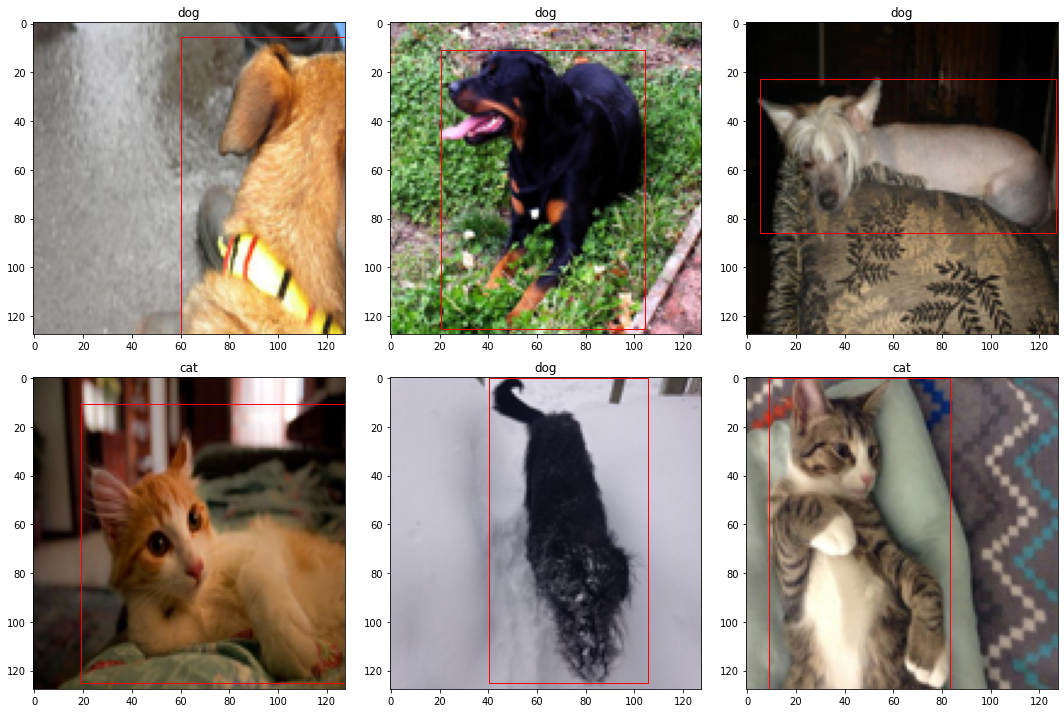

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (15, 10))
ax = ax.flatten()

for i, j in enumerate(np.random.choice(X_train.shape[0], size = 6, replace = False)):
    coords = y_train_bbox[j] * 128
    ax[i].imshow(X_train[j].reshape(128, 128, 3))
    ax[i].set_title(idx_to_label[y_train_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2] - coords[0], coords[3] - coords[1], 
                                  edgecolor = 'red', facecolor = 'none'))

plt.tight_layout()
plt.show()

Now that we have augmented the training data, let's apply the `MinMaxScaler()` to the input data and then create the torch tensors from the numpy arrays for all of the data that we require.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((-1, 128, 128, 3))
X_val = X_val.reshape((-1, 128, 128, 3))
X_test = X_test.reshape((-1, 128, 128, 3))

X_train_tensor = torch.from_numpy(X_train).float()
del X_train # Free up RAM

y_train_label_tensor = torch.from_numpy(y_train_label).long()
y_train_bbox_tensor = torch.from_numpy(y_train_bbox).float()

X_val_tensor = torch.from_numpy(X_val).float()
del X_val # Free up RAM

y_val_label_tensor = torch.from_numpy(y_val_label).long()
y_val_bbox_tensor = torch.from_numpy(y_val_bbox).float()

X_test_tensor = torch.from_numpy(X_test).float()
del X_test # Free up RAM

y_test_label_tensor = torch.from_numpy(y_test_label).long()
y_test_bbox_tensor = torch.from_numpy(y_test_bbox).float()

Now, we can define `TensorDataset` and `DataLoader` objects that will be used in the PyTorch data. The `DataLoader` object automatically creates shuffled batches of a particular size for the model to use during optimization.

In [ ]:
train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_label_tensor, y_train_bbox_tensor)
val_ds = torch.utils.data.TensorDataset(X_val_tensor, y_val_label_tensor, y_val_bbox_tensor)
test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_label_tensor, y_test_bbox_tensor)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = 64, shuffle = True, num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = 512, shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = 512, shuffle = False, num_workers = 2)

Here, we need to redefine the train and evaluate function so that they work for our new multitask model. The main differences are that the functions now take two criterions instead of one, and they compute both losses and add them together before backpropagating the loss. In addition, the model will now output two separate arrays corresponding to the predicted labels and the predicted bounding box coordinates.

In [ ]:
def train_multitask(epoch, model, train_loader, criterion_CXE, criterion_MSE, optimizer, device, verbose):
    # Define variables to keep track of the running loss and the number of correct classficiations
    running_loss = 0.0
    correct = 0
    total = 0

    # Set the model in training mode
    model.train()

    print('-'*10, f'Epoch {epoch}', '-'*10)

    # Iterate through all of the batches in the DataLoader object
    for batch_idx, (inputs, y_true_label, y_true_bbox) in enumerate(train_loader):
        # Send the inputs, y_true_label, and y_true_bbox to the appropriate device
        inputs = inputs.to(device)
        y_true_label = y_true_label.to(device)
        y_true_bbox = y_true_bbox.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Compute the model outputs
        y_pred_label, y_pred_bbox = model(inputs)

        # Calculate the model loss functions
        loss_CXE = criterion_CXE(y_pred_label, y_true_label)
        loss_MSE = criterion_MSE(y_pred_bbox, y_true_bbox)

        # Add the CXE and MSE losses
        loss = loss_CXE + loss_MSE

        # Backpropagate the loss through the network
        loss.backward()

        # Update the model weights
        optimizer.step()

        # Add the loss for this batch to the running total loss
        running_loss += loss.item()

        # Keep track of the number of correct classifications
        _, pred = torch.max(y_pred_label, dim = 1)
        correct += torch.sum(pred == y_true_label).item()
        total += y_true_label.size(0)

        # If verbose is true, then output the loss for each 20 batches
        if batch_idx % 20 == 0 and verbose:
            print(f'Batch {batch_idx} CXE + MSE Loss: {loss.item():.3f}')
    
    # Find the mean loss across all batches and print out the average loss and accuracy and return those values
    loss = running_loss / len(train_loader)
    acc = 100 * correct / total
    print(f'Train CXE + MSE Loss: {loss:.3f} | Train Label Accuracy: {acc:.3f}%')

    return loss, acc

def evaluate_multitask(model, data_loader, criterion_CXE, criterion_MSE, device, tag):
    # Define variables to keep track of the running loss and the number of correct classficiations
    running_loss = 0.0
    correct = 0
    total = 0

    # Set the model in evaluation mode
    model.eval()

    # torch.no_grad() ensures that gradients are not calculated for whatever is inside the with statement
    with torch.no_grad():

        # Iterate through all of the batches in the DataLoader object
        for batch_idx, (inputs, y_true_label, y_true_bbox) in enumerate(data_loader):
            # Send the inputs, y_true_label, and y_true_bbox to the appropriate device
            inputs = inputs.to(device)
            y_true_label = y_true_label.to(device)
            y_true_bbox = y_true_bbox.to(device)

            # Compute the model outputs
            y_pred_label, y_pred_bbox = model(inputs)

            # Calculate the model loss functions
            loss_CXE = criterion_CXE(y_pred_label, y_true_label)
            loss_MSE = criterion_MSE(y_pred_bbox, y_true_bbox)

            # Add the CXE and MSE losses
            loss = loss_CXE + loss_MSE

            # Add the loss for this batch to the running total loss
            running_loss += loss.item()

            # Keep track of the number of correct classifications
            _, pred = torch.max(y_pred_label, dim = 1)
            correct += torch.sum(pred == y_true_label).item()
            total += y_true_label.size(0)

    # Find the mean loss across all batches and print out the average loss and accuracy and return those values
    loss = running_loss / len(data_loader)
    acc = 100 * correct / total
    print(f'{tag} CXE + MSE Loss: {loss:.3f} | {tag} Label Accuracy: {acc:.3f}%\n')

    return loss, acc

Now, let's define the MultiTask PyTorch model using the OOP API. The model takes two parameters: the number of label outputs (2 in our case) and the number of bbox_outputs (4 in our case). The model first starts out with some convolutional layers, including Conv2d, BatchNorm2d, and MaxPool2d. These layers attempt to extract important features from the images. Once the convolution layer is done, we are left with 16384 flattened features that are fully connected to a hidden layer with 64 neurons. Then, we split the model into two (we create multiple heads): one for classification and regression. The classification head propagates to another hidden layer with 32 neurons and then propagates to the output with 2 neurons. The regression head propagates to another hidden layer with 32 neurons and then propagates to the output with 4 neurons. The activation function is consistently ReLU here, and we make use of the BatchNorm and Dropout nodes in order to help prevent the model from overfitting.

In [ ]:
class MultiTaskNet(torch.nn.Module):
    def __init__(self, label_output, bbox_output):
        super().__init__()

        self.convolutional = torch.nn.Sequential(torch.nn.Conv2d(3, 4, kernel_size = 3, stride = 1, padding = 1),
                                                 torch.nn.BatchNorm2d(4),
                                                 torch.nn.ReLU(),
                                                 torch.nn.Conv2d(4, 8, kernel_size = 3, stride = 1, padding = 1),
                                                 torch.nn.BatchNorm2d(8),
                                                 torch.nn.ReLU(),
                                                 torch.nn.MaxPool2d(2, 2),

                                                 torch.nn.Conv2d(8, 16, kernel_size = 3, stride = 1, padding = 1),
                                                 torch.nn.BatchNorm2d(16),
                                                 torch.nn.ReLU(),
                                                 torch.nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
                                                 torch.nn.BatchNorm2d(16),
                                                 torch.nn.ReLU(),
                                                 torch.nn.MaxPool2d(2, 2),

                                                 torch.nn.Flatten())

        self.shared = torch.nn.Sequential(torch.nn.Linear(16384, 64),
                                          torch.nn.BatchNorm1d(64),
                                          torch.nn.ReLU(),
                                          torch.nn.Dropout(0.5))
        
        self.label = torch.nn.Sequential(torch.nn.Linear(64, 32),
                                         torch.nn.BatchNorm1d(32),
                                         torch.nn.ReLU(),
                                         torch.nn.Dropout(0.5),
                                         torch.nn.Linear(32, label_output))

        self.bbox = torch.nn.Sequential(torch.nn.Linear(64, 32),
                                        torch.nn.BatchNorm1d(32),
                                        torch.nn.ReLU(),
                                        torch.nn.Dropout(0.5),
                                        torch.nn.Linear(32, bbox_output))

    def forward(self, x):
        x = torch.permute(x, (0, 3, 1, 2))
        x = self.convolutional(x)
        x = self.shared(x)
        y_label = self.label(x)
        y_bbox = self.bbox(x)
        return y_label, y_bbox

The model is instanced here along with the optimizer and the two criterion for MSE loss and CXE loss. We perform training on the model and evaluate the model for 30 epochs since it takes much longer to go through each epoch.

In [ ]:
%%time
# Set the PyTorch seed for consistent results
torch.manual_seed(42)

# Create a model using the OOP API along with the criterions and optimizer that will be used
model_multitask = MultiTaskNet(2, 4)
criterion_CXE = torch.nn.CrossEntropyLoss()
criterion_MSE = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_multitask.parameters(), lr = 0.001, weight_decay = 0.001)

# Send the model and criterion to the device
model_multitask = model_multitask.to(device)
criterion_CXE = criterion_CXE.to(device)
criterion_MSE = criterion_MSE.to(device)

# Create lists that will store the history of the losses and accuracies
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# Perform training on the training set and evaluation on the validation set for 30 epochs
for epoch in range(30):
    loss, acc = train_multitask(epoch, model_multitask, train_loader, criterion_CXE, criterion_MSE, optimizer, device, False)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = evaluate_multitask(model_multitask, val_loader, criterion_CXE, criterion_MSE, device, '  Val')
    val_loss.append(loss)
    val_acc.append(acc)

---------- Epoch 0 ----------
Train CXE + MSE Loss: 0.879 | Train Label Accuracy: 54.742%
  Val CXE + MSE Loss: 0.697 |   Val Label Accuracy: 59.983%

---------- Epoch 1 ----------
Train CXE + MSE Loss: 0.708 | Train Label Accuracy: 61.855%
  Val CXE + MSE Loss: 0.673 |   Val Label Accuracy: 64.010%

---------- Epoch 2 ----------
Train CXE + MSE Loss: 0.654 | Train Label Accuracy: 65.692%
  Val CXE + MSE Loss: 0.632 |   Val Label Accuracy: 66.924%

---------- Epoch 3 ----------
Train CXE + MSE Loss: 0.616 | Train Label Accuracy: 69.015%
  Val CXE + MSE Loss: 0.611 |   Val Label Accuracy: 69.066%

---------- Epoch 4 ----------
Train CXE + MSE Loss: 0.568 | Train Label Accuracy: 73.491%
  Val CXE + MSE Loss: 0.617 |   Val Label Accuracy: 68.638%

---------- Epoch 5 ----------
Train CXE + MSE Loss: 0.524 | Train Label Accuracy: 75.519%
  Val CXE + MSE Loss: 0.629 |   Val Label Accuracy: 65.810%

---------- Epoch 6 ----------
Train CXE + MSE Loss: 0.467 | Train Label Accuracy: 78.985%
  Va

We can now plot the train and validation loss and accuracy curves with respect to the number of epochs.

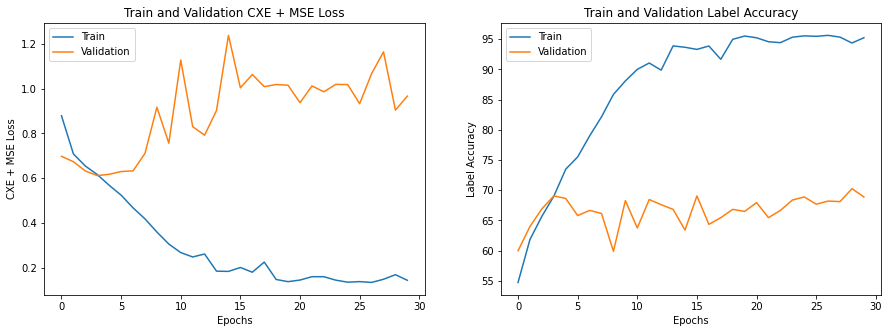

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax[0].set_title('Train and Validation CXE + MSE Loss')
ax[0].plot(train_loss, label = 'Train')
ax[0].plot(val_loss, label = 'Validation')
ax[0].set(xlabel = 'Epochs', ylabel = 'CXE + MSE Loss')
ax[0].legend(loc = 'best')

ax[1].set_title('Train and Validation Label Accuracy')
ax[1].plot(train_acc, label = 'Train')
ax[1].plot(val_acc, label = 'Validation')
ax[1].set(xlabel = 'Epochs', ylabel = 'Label Accuracy')
ax[1].legend(loc = 'best')

plt.show()

Finally, let's compute the loss and accuracy on the test dataset to see how well the model generalizes.

In [ ]:
loss, acc = evaluate_multitask(model_multitask, test_loader, criterion_CXE, criterion_MSE, device, 'Test')

Test CXE + MSE Loss: 1.076 | Test Label Accuracy: 68.157%



Let's save our results in the pandas `DataFrame`.

In [ ]:
pytorch_model_results.loc[len(pytorch_model_results)] = ['CNN PyTorch Classification + Regression',
                                                         'CXE + MSE',
                                                         30,
                                                         round(train_loss[-1], 3),
                                                         round(val_loss[-1], 3),
                                                         round(loss, 3),
                                                         round(train_acc[-1], 3),
                                                         round(val_acc[-1], 3),
                                                         round(acc, 3)]
pytorch_model_results

Model Loss Function  ... Val Acc  Test Acc
0  CNN PyTorch Classification + Regression     CXE + MSE  ...  68.895    68.157

[1 rows x 9 columns]

#### Results and Discussion
This model has the highest test and validation accuracy scores, but also overfits the most despite the attempts at regularization with more training data, weight decay, and batchnorm and dropout layers. Overall though, an accuracy of 68.157% is much better than random chance (50%) for classification, and this shows that combining the CXE and MSE loss functions works very well.